  # **<font color="orange">Objective</font>**:
    
  **Aim is to identify patterns which indicate if a client has <font color="red">difficulty while paying</font> their installments.**
    
   **In other words, the company wants to <font color="green">understand the driving factors (or driver variables) behind loan default</font>, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.**

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required libraries here

import numpy as np                            
import pandas as pd                           
import matplotlib.pyplot as plt
import seaborn as sns

#To Display all the rows and columns in dataframe
pd.set_option('display.max_columns', None)
pd. set_option("display.max_rows", None) 

## **<font color="blue">APPLICATION DATA</font>**
1. Data Loading
2. Checking,  
    2.1 Size<br>
    2.2 Shape<br>
    2.3 Data Attributes<br>
    2.4 Data type of each Attribute<br>
    2.5 Description and Distribution of Data<br>
    2.6 Identifying Categorical Data<br>
    2.7 Understanding Categorical Data Provided<br>
    2.8 Observations 1<br>
    2.9 Identifying Continuous Data<br>
    2.10 Understanding Continuous Data Provided<br>
    2.11 Observations 2<br>
3. Data Selection and Data Correction<br>
    3.1 Data Correction<br>
    3.2 Data Type Correction<br>
    3.3 Data Section and Data Elimination<br>
4. Missing Values Analysis<br>
    4.1 Identification of Percentange of Missing Values<br>
    4.2 Reasons Analysis and Imputation Recommendation    
5. Outlier Analysis<br>
    5.1 Identification of Outlier Data<br> 
    5.2.Outlier Analysis on Selected Data<br>
6. Data Creation<br>
    6.1 Binning<br>
7. Data Analysis and Patterns Identification<br>
    7.1 Target Data Balanced or Imbalanced?<br>
    7.2 Data Isolation Based on Target Variable<br>
    7.3 Univariant Analysis on Categorical Data with respective to Target<br>
    7.4 Bivariant analysis on Categorical-Categorical Data with respective to Target<br>
    7.5 Finding Hidden Correlation among Continuous Data<br>
    7.6 Observations<br>
    7.7 Univariant Analysis on Continuous Data with respective to Target<br>
    7.8 Bivariant Analysis on Continuous - Continuous Data with respective to Target<br>
    7.9 Bivariant Analysis on Categorical and Continuous Data with respective to Target<br>


## **<font color="sky blue">1. Data Loading</font>** :

**Loading...**

In [2]:
# Loading Data from CSV to dataframe. Using pandas read_csv function to load data to dataframe
application_data = pd.read_csv("DATA/application_data.csv")
# To display first 5 records
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## **<font color="sky blue">2.Data checks</font>**

### **<font color="#F08080">2.1 Size & 2.2 Shape</font>**

**Using Pandas info() to Understand size of application data, number of applications, number of data attributes provided**

In [3]:
# using info to get number of applications, nu
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


**Application Data Statistics:**<br>
            - <font color = "#6495ED"> Number of Records</font> in Application Dataset: <font color = "#6495ED">***3,07,511***</font><br>
            - Number of <font color = "#6495ED"> Dimensions</font> in Application Dataset: <font color = "#6495ED">***122***</font><br>
            - <font color = "#6495ED">Data Size</font> of Application Dataset: <<font color = "#6495ED">***286.2+ MB***</font><br> 

### **<font color="#F08080">2.3 Data Attributes</font>**

In [4]:
application_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

Description of these attributes provide here: **https://docs.google.com/spreadsheets/d/1XGLeDgbWSswnJVhrS_GDKdDzWd_nDJJxWVDAySUJxpE/edit?usp=sharing**

### **<font color="#F08080">2.4 Data type of each Attribute</font>**

In [5]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


**Data is loading as int, float , object data. But just by looking at this info we can't categorize categorical and continuous data. So, need to do categorical and numberical data analysis**

### **<font color="#F08080">2.5 Description and Distribution of Data</font>**

In [6]:
# To check the distribution of application data
application_data.describe() 

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### **<font color="#F08080">2.6 Identifying Categorical Data</font>**

**Criteria Followed/Assumed**<br>
Finding Unique Values to Identify Categorial and Numerical Data.  If the count of unique values in a column is <font color="red">**less than 100**</font>. Then It is a considered as categorical attribute and also please checking manually whether the column logically fit to categorical category or not.**

**If the Column fit to categorical data, then we can change dtype to** <font color="green">**'category'**</font>


In [7]:
#To find number of unique values in each column
application_data.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [8]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


**Identified Categorical Data Columns Mentioned below**

In [9]:
categorical_attributes = ["TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN",
               "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
               "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",'FLAG_PHONE' ,"FLAG_EMAIL", "OCCUPATION_TYPE",
               "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START",
              "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY"
               , "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE", "OBS_30_CNT_SOCIAL_CIRCLE", 
              "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 
              "FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7",
               "FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13",
               "FLAG_DOCUMENT_14","FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", 
               "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "AMT_REQ_CREDIT_BUREAU_HOUR",
               "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT",
               "AMT_REQ_CREDIT_BUREAU_YEAR", 'FONDKAPREMONT_MODE','WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'HOUSETYPE_MODE']

### **<font color="#F08080">2.7 Understanding Categorical Data Provided</font>**

Plotting All Categorical Data to Understand Categorcal Data. Plotting Data on Bar Plots on  21x3 matrix<br>
Note:  Double click on output cell for better visiualization 

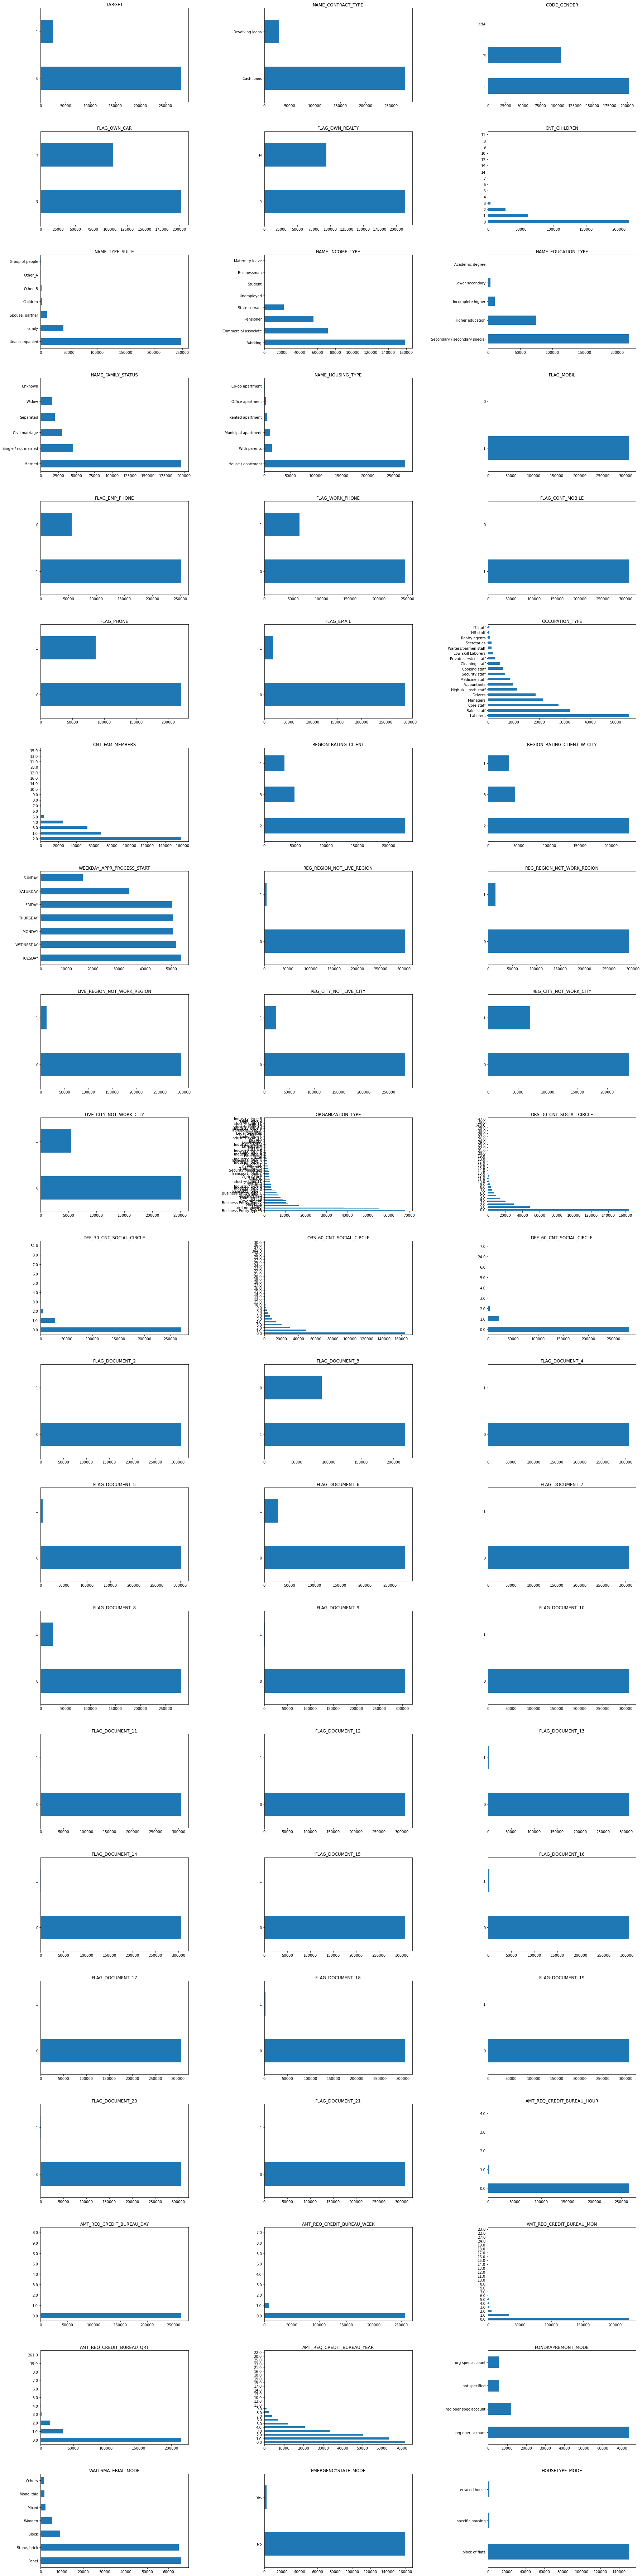

In [10]:
fig = plt.figure(figsize=(25,100))
for index, col in enumerate(categorical_attributes):
    ax= fig.add_subplot(21,3, index+1)
    ax.set_title(col)
    application_data[col].value_counts().plot(kind ="barh")

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

**Note:** In the above graph ORGANIZATION_TYPE is not clearly visible on normal scale. So plotting it again below

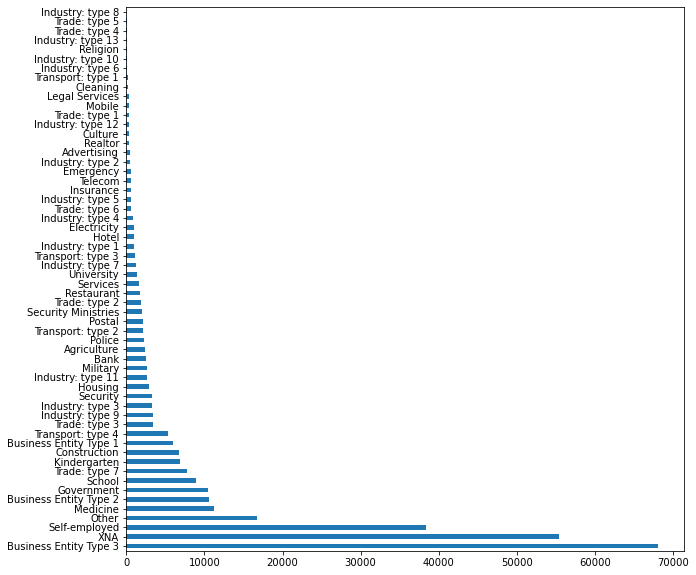

In [11]:
# Plotting rganization graph separately since it's not clear in subplotting
fig = plt.figure(figsize=(10,10))
application_data.ORGANIZATION_TYPE.value_counts().plot(kind="barh")
plt.show()

**Note:** Below Operations performed to understand the data better

In [12]:
payment_defaulters_percentage = (len(application_data[application_data.TARGET==1])/len(application_data) ) * 100
revolving_loan_percentage = (len(application_data[application_data.NAME_CONTRACT_TYPE=="Revolving loans"])/len(application_data) ) * 100
gender_ratio =  (len(application_data[application_data.CODE_GENDER=="F"])/len(application_data) ) * 100

In [13]:
print(payment_defaulters_percentage, revolving_loan_percentage, gender_ratio)

8.072881945686495 9.521285417432223 65.83439291602576


In [14]:
len(application_data[application_data["CODE_GENDER"] == "XNA"])

4

### **<font color="#F08080">2.8 Observations 1</font>**

1. <font color="IndianRed">~ 8 %</font> of the applications data are <font color="IndianRed">facing difficulty((TARGET 1) in repaying</font>
2. <font color="IndianRed">~ 9 %</font>of the applications data received for 'Revolving Loan'.  <font color="IndianRed">~ 91 % </font>applied for <font color='IndianRed'>cash loan'</font>
3. To my suprise , Received more appications from Females. Among this huge data, 4 applicants not provided gender info.
   Not Available gender info coded as XNA.<br>
   Assuming it as not Randomly Missed Data.<br>
   There is a small possibily that some people don't like to provide their sexuality.<br>
   But, Need to verify this with data collection process this is mandatory information or not<br>
   If this is mandatory that need data to be collected form apllicants. Then, there is high possibilty that error happend at time of manual collection of data or data entry.<br>
4. Many applicants don't have children. It quite understandable, many applicants family status is single and younger 
5. Received more applications from Working class(including self employed)
6. Received more applications from  people who has Secondary or Higher education 
7. Many apllications received from Married persons with family of size 2
8. Almost ~ 100 % applicants are provided his/her personal mobile number. Since there is no variance in the data(FLAG_MOBILE, FLAG_CONT_MOBILE).So, we can drop these columns.
9. Many applications received on weekdays 
10. For the most of the applications contact and perminant address is same
11. Almost all applicants provided below Documents. Seems like these documents are mandatory Documents to process a loan. Since there is no variance in the data we can simply drop them
            FALG_DOCUMENT_2
            FALG_DOCUMENT_4
            FALG_DOCUMENT_7
            FALG_DOCUMENT_10
            FALG_DOCUMENT_11
            FALG_DOCUMENT_12
            FALG_DOCUMENT_13
            FALG_DOCUMENT_14
            FALG_DOCUMENT_15
            FALG_DOCUMENT_17
            FALG_DOCUMENT_19
            FALG_DOCUMENT_20
            FALG_DOCUMENT_21

12. ORGANIZATION TYPE was set to XNA for Pensioners and Unemployed. Point to mension here it is not missing information. It represents not applicablility.

### **<font color="#F08080">2.9 Identifying Continuous Data</font>**

**Criteria Followed/Assumed**<br>
Getting all numberical data attributes by removing categorical columns from all columns. Make sure that all numberical data represented in int or float or timeseries

In [15]:
#To get all numerical columns
numberical_data_columns = list(set(application_data.columns.to_list()) - set(categorical_attributes))
print(numberical_data_columns)

['YEARS_BEGINEXPLUATATION_AVG', 'APARTMENTS_MODE', 'HOUR_APPR_PROCESS_START', 'LIVINGAREA_MODE', 'YEARS_BUILD_MEDI', 'LANDAREA_MEDI', 'ELEVATORS_MODE', 'COMMONAREA_AVG', 'FLOORSMAX_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'REGION_POPULATION_RELATIVE', 'ENTRANCES_AVG', 'AMT_GOODS_PRICE', 'LIVINGAPARTMENTS_MODE', 'ELEVATORS_MEDI', 'LANDAREA_MODE', 'ENTRANCES_MODE', 'SK_ID_CURR', 'YEARS_BEGINEXPLUATATION_MEDI', 'BASEMENTAREA_MEDI', 'EXT_SOURCE_3', 'APARTMENTS_MEDI', 'NONLIVINGAREA_MODE', 'ELEVATORS_AVG', 'BASEMENTAREA_AVG', 'DAYS_BIRTH', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'AMT_ANNUITY', 'NONLIVINGAREA_MEDI', 'OWN_CAR_AGE', 'FLOORSMAX_MODE', 'TOTALAREA_MODE', 'APARTMENTS_AVG', 'DAYS_REGISTRATION', 'YEARS_BUILD_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'BASEMENTAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'LIVINGAREA_AVG', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI', 'DAYS_EMPLOYED', 'NONLIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG'

**Identified Numerical Data Columns Mentioned below**

In [16]:
numberical_data_columns = ['LIVINGAREA_MEDI','LIVINGAREA_AVG', 'LIVINGAREA_MODE',
                            'COMMONAREA_MEDI','COMMONAREA_AVG', 'COMMONAREA_MODE',
                            'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE',
                             'FLOORSMAX_MEDI','FLOORSMIN_AVG', 'FLOORSMIN_MODE',
                              'ENTRANCES_MEDI' , 'ENTRANCES_AVG' ,'ENTRANCES_MODE',
                             'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
                              'ELEVATORS_MEDI' ,'ELEVATORS_AVG', 'ELEVATORS_MODE',
                             'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
                             'NONLIVINGAPARTMENTS_MEDI' , 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
                              'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE',
                             'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE',
                             'BASEMENTAREA_MEDI','BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
                             'FLOORSMIN_MEDI','FLOORSMAX_AVG', 'FLOORSMAX_MODE',
                             'YEARS_BUILD_MEDI','YEARS_BUILD_AVG','YEARS_BUILD_MODE',
                             'TOTALAREA_MODE',
                             'EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3',
                             'REGION_POPULATION_RELATIVE',  
                             'AMT_ANNUITY', 'DAYS_BIRTH', 'OWN_CAR_AGE', 
                             'DAYS_REGISTRATION','HOUR_APPR_PROCESS_START', 
                             'AMT_CREDIT', 'DAYS_EMPLOYED',
                             'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE',
                             'AMT_INCOME_TOTAL', 
                              'DAYS_ID_PUBLISH', 
                             ]

### **<font color="#F08080">2.10 Understanding Continuous Data Provided</font>**

**Plotting numerical aata attributes to understand the given data attributes and their distribution. Plotting Displot and Boxplot for better understanding**

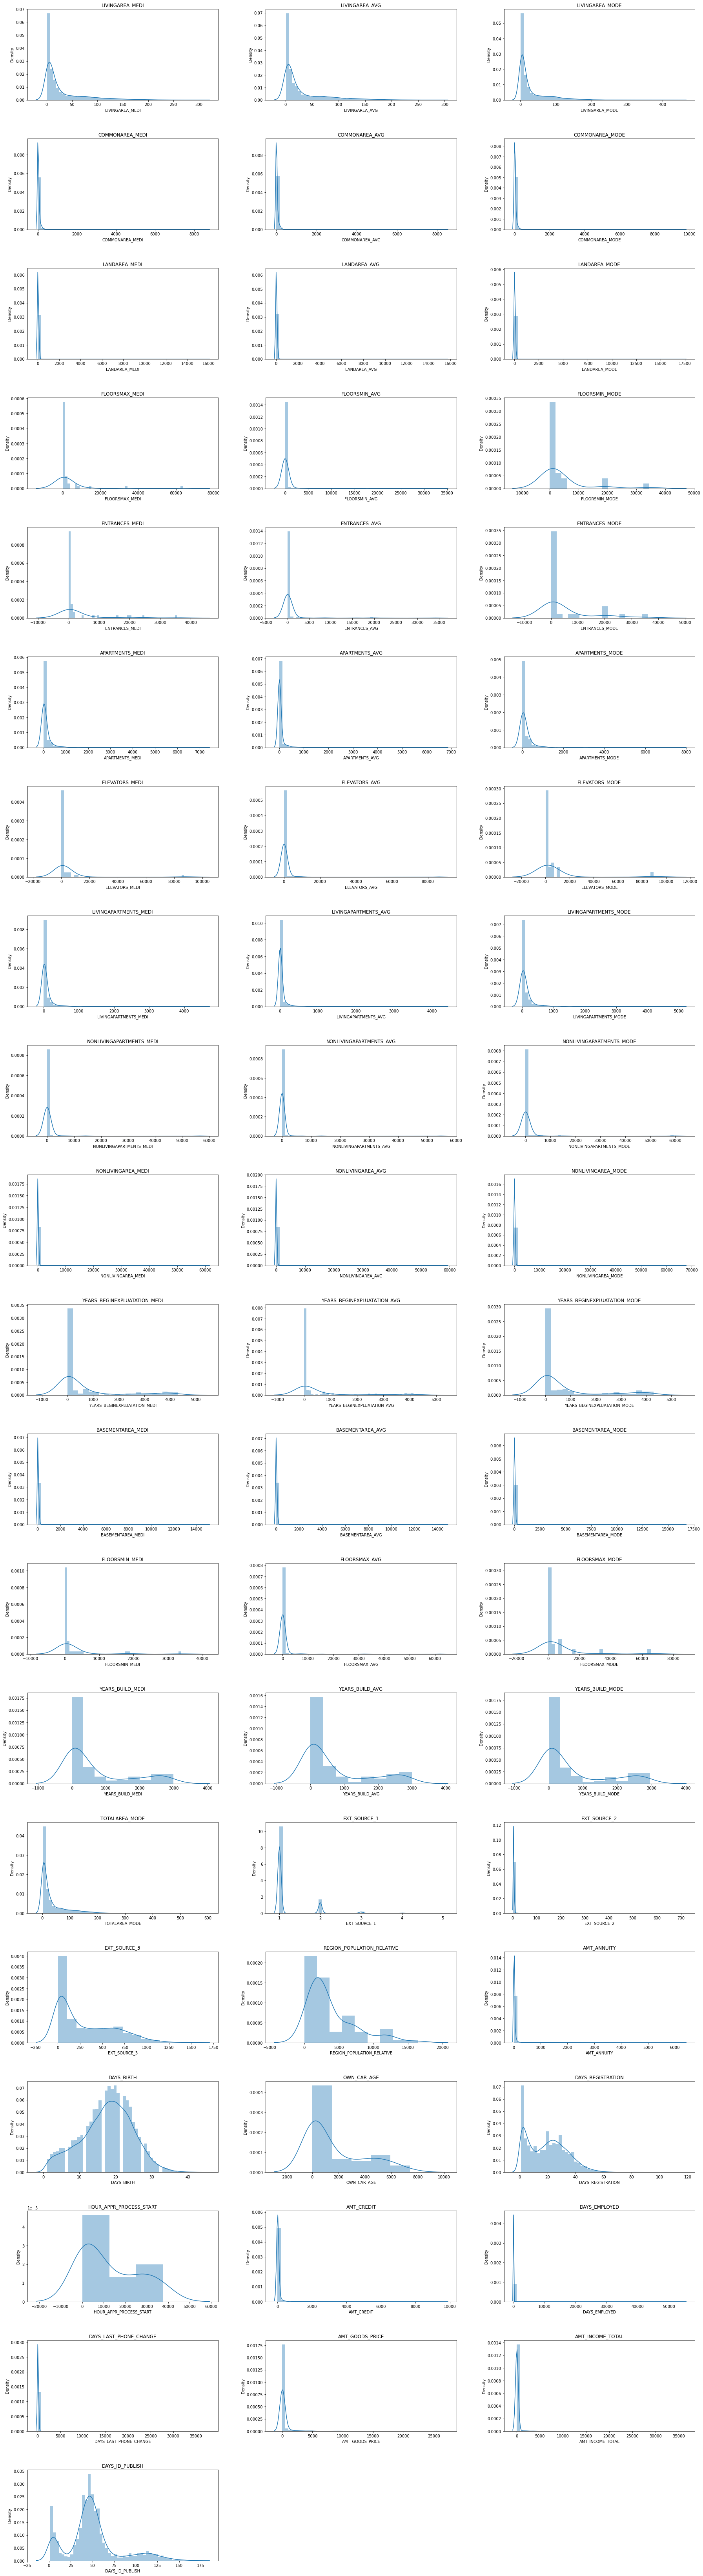

In [17]:
fig = plt.figure(figsize=(25,100))
column = 0
row = 0
for index, col in enumerate(numberical_data_columns):
    if column > 4:
        column = 0
        row = row+1
    ax= fig.add_subplot(22,3, index+1)
    ax.set_title(col)
    sns.distplot(application_data[col].value_counts())

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

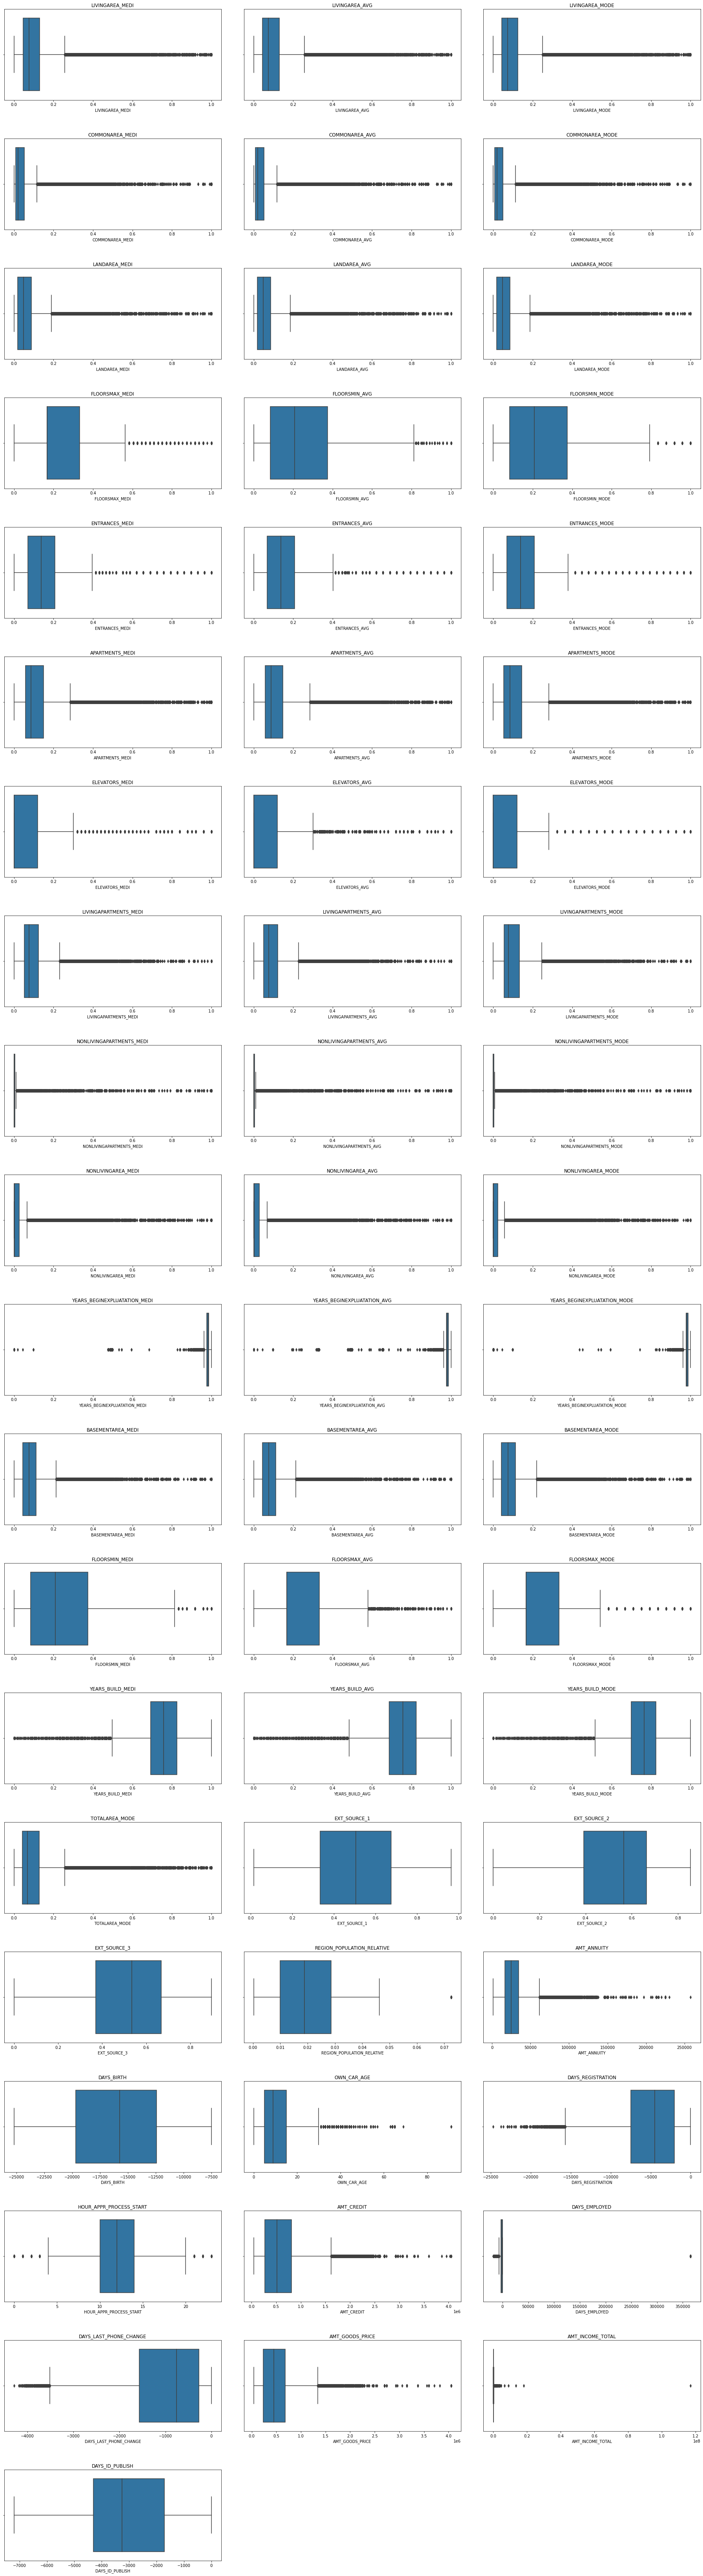

In [18]:
fig = plt.figure(figsize=(25,100))
for index, col in enumerate(numberical_data_columns):
    if column > 4:
        column = 0
        row = row+1
    ax= fig.add_subplot(22,3, index+1)
    ax.set_title(col)
    sns.boxplot(application_data[col])

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

**Note:Found Outliers in few columns**<br>

Data Columns : DAYS_EMPLOYED, AMT_INCOME_TOTAL, REGION_POPULATION_RELATIVE, AMT_ANNUITY, AMT_CREDIT
So, Prceeding with invetstigation of outliers in data attributes DAYS_EMPLOYED, AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE, AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE

Attributes used to describe building are exibiting same distribution in all metrics MEDI, AVG, MODE. So, We can take median metric for further analysis. Remaing two measures can be dropped.

Seems Data in prefix DAYS_ are provided in negative scale. we can do some correction there.

Age is normally distributed

### **<font color="#F08080">2.11 Observations 2</font>**

1. DAYS_OF_BIRTH is given in days and in negative number. So, for readbility purpose we can bring this data to positive scale.
   No anomility observed in this data. Data is normally distribiuted and data is logically following real life pattern 
2. As mentioned above point all other columns prefix DAYS_ are given in negative number we can bring them to positive scale
3. Attributes used to describe building are exibiting same distribution in all metrics MEDI, AVG, MODE. So, We can take median metric for further analysis. Remaing two measures can be dropped.
4. Youngest applicant age is 20 and oldest applicant age is 69
5. DAYS_EMPLOYED has outliers. Max value of this columns is 365243 ~ 999.0  years. Practically it is not possible value. So did a analysis. Seems like for Pensioner and Unemployed people this value se to 365243 by default. In a way this is the best representation to specify this data not applicable for numerical data
6. LIVINGAREA_MEDI, LIVINGAREA_AVG, LIVINGAREA_MODE, and all other attribute in this category : seems to have same distribution.
   So, we can consider median for analysis. Other two can be dropped
7. AMT_INCOME_TOTAL has outlier with value 117000000.0 . Strangly she(F) is facing defficulty in paying her 26194.5 annuity. Seems like data entry mistake when we analyze her income and AMT CREDIT and AMT annuity data or need to check her previous loan history to identify whether she has still paying huge loans
8. ORGANIZATION_TYPE is set to XNA for unemployed and pensioners
9. 8412 applicants lives in  where  population density is 0.0725(normalized). May be these people are living in metro city.
10. DAYS_REGISTRATION has a outlier 24672(SK_ID_CURR 234093). Her age is 67 and registration age also mentioned as 67 years. Seems likenot practical entry. May be a data entry Issue.
11. OWN_CAR_AGE has outlier 91(2 applicants). Interestly both of them Drivers. Works in different Industry and has significant difference in income level. Applicant who earns more money has difficulty in repaying
12. AMT_CREDIT, AMT_INCOME_TOTAL distribution has many local peaks. So we can perform binning on them


## **<font color="sky blue">3. Data Selection and Data Correction</font>**

### **<font color="#F08080">3.1 Data Correction</font>**


Taken absolute value for Data in Columns with  prefix DAYS_

In [19]:
#TODO need to transfer days and age column
days_cols = [col for col in application_data.columns if col.startswith("DAY")]
print(days_cols)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [20]:
for col in days_cols:
    application_data[col] = abs(application_data[col])

application_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       19046            225             4260.0             2531   
3       19005           3039             9833.0             2437   
4       19932           3038             4311.0             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0

### **<font color="#F08080">3.2 Data Type Correction</font>**

Categorical data loaded as different datatypes(int, float, object). So, converting the categorical columns data type to 'category'

In [21]:
# To convert categorical data to 'category'
for col in categorical_attributes:
    application_data[col] = application_data[col].astype('category')

DAYS_ should be in integer.

In [22]:
application_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].dtypes

DAYS_BIRTH                  int64
DAYS_EMPLOYED               int64
DAYS_REGISTRATION         float64
DAYS_ID_PUBLISH             int64
DAYS_LAST_PHONE_CHANGE    float64
dtype: object

DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE represented in float. Converting them to int

In [23]:
application_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].isnull().sum()

DAYS_BIRTH                0
DAYS_EMPLOYED             0
DAYS_REGISTRATION         0
DAYS_ID_PUBLISH           0
DAYS_LAST_PHONE_CHANGE    1
dtype: int64

In [24]:
application_data[application_data["DAYS_LAST_PHONE_CHANGE"].isnull() == True]["DAYS_LAST_PHONE_CHANGE"]


15709   NaN
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [25]:
application_data.loc[15709, "DAYS_LAST_PHONE_CHANGE"] = 0

In [26]:
application_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].isnull().sum()

DAYS_BIRTH                0
DAYS_EMPLOYED             0
DAYS_REGISTRATION         0
DAYS_ID_PUBLISH           0
DAYS_LAST_PHONE_CHANGE    0
dtype: int64

In [27]:
for col in ["DAYS_REGISTRATION", "DAYS_LAST_PHONE_CHANGE"]:
    application_data[col] = application_data[col].astype(np.int64)
application_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   DAYS_BIRTH              307511 non-null  int64
 1   DAYS_EMPLOYED           307511 non-null  int64
 2   DAYS_REGISTRATION       307511 non-null  int64
 3   DAYS_ID_PUBLISH         307511 non-null  int64
 4   DAYS_LAST_PHONE_CHANGE  307511 non-null  int64
dtypes: int64(5)
memory usage: 11.7 MB


### **<font color="#F08080">3.3 Data Section and Data Elimination<br></font>**

FLAG_MOBILE variance(almost all values ser to 1) is ~0 . So dropping this column 

In [28]:
# Drop 
application_data.drop(["FLAG_MOBIL", "FLAG_CONT_MOBILE", "FLAG_DOCUMENT_2","FLAG_DOCUMENT_4","FLAG_DOCUMENT_7",
                       "FLAG_DOCUMENT_10","FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14",
                       "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_17","FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"],
                      axis=1, inplace=True)

We have credits score from 3 sources. So, checking for possiblities to reduce the dimensionality without losing critical information

In [29]:
application_data[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].isnull().sum()/ len(application_data)

EXT_SOURCE_1    0.563811
EXT_SOURCE_2    0.002146
EXT_SOURCE_3    0.198253
dtype: float64

~56 of data is mising in EXT_SOURCE_1, so droping this column 

In [30]:
application_data.drop(["EXT_SOURCE_1"], axis=1,inplace=True)

Normalized information for building MEDI, AVG, MODE showing same distributions for many columns. So , taking only MEDIAN METRIC INFO. Droping AVG and MODE

In [31]:
building_status_columns = ['LIVINGAREA_AVG', 'LIVINGAREA_MODE',
                            'COMMONAREA_AVG', 'COMMONAREA_MODE',
                             'LANDAREA_AVG', 'LANDAREA_MODE',
                             'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
                              'ENTRANCES_AVG' ,'ENTRANCES_MODE',
                              'APARTMENTS_AVG', 'APARTMENTS_MODE',
                              'ELEVATORS_AVG', 'ELEVATORS_MODE',
                             'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
                              'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
                              'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE',
                             'YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE',
                            'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
                              'FLOORSMIN_AVG','FLOORSMIN_MODE',
                               'YEARS_BUILD_AVG','YEARS_BUILD_MODE'
                             ]
application_data.drop(building_status_columns, axis=1,inplace=True)

**Shape after droping few columns**

In [32]:
application_data.shape

(307511, 78)

## **<font color="sky blue">4. Missing Values Analysis</font>**

### **<font color="#F08080">4.1 Identification of Percentange of Missing Values<br></font>**

In [33]:
missing_value_percentage_df = application_data.isnull().sum()/len(application_data) * 100

In [34]:
missing_value_percentage = missing_value_percentage_df[missing_value_percentage_df > 0]

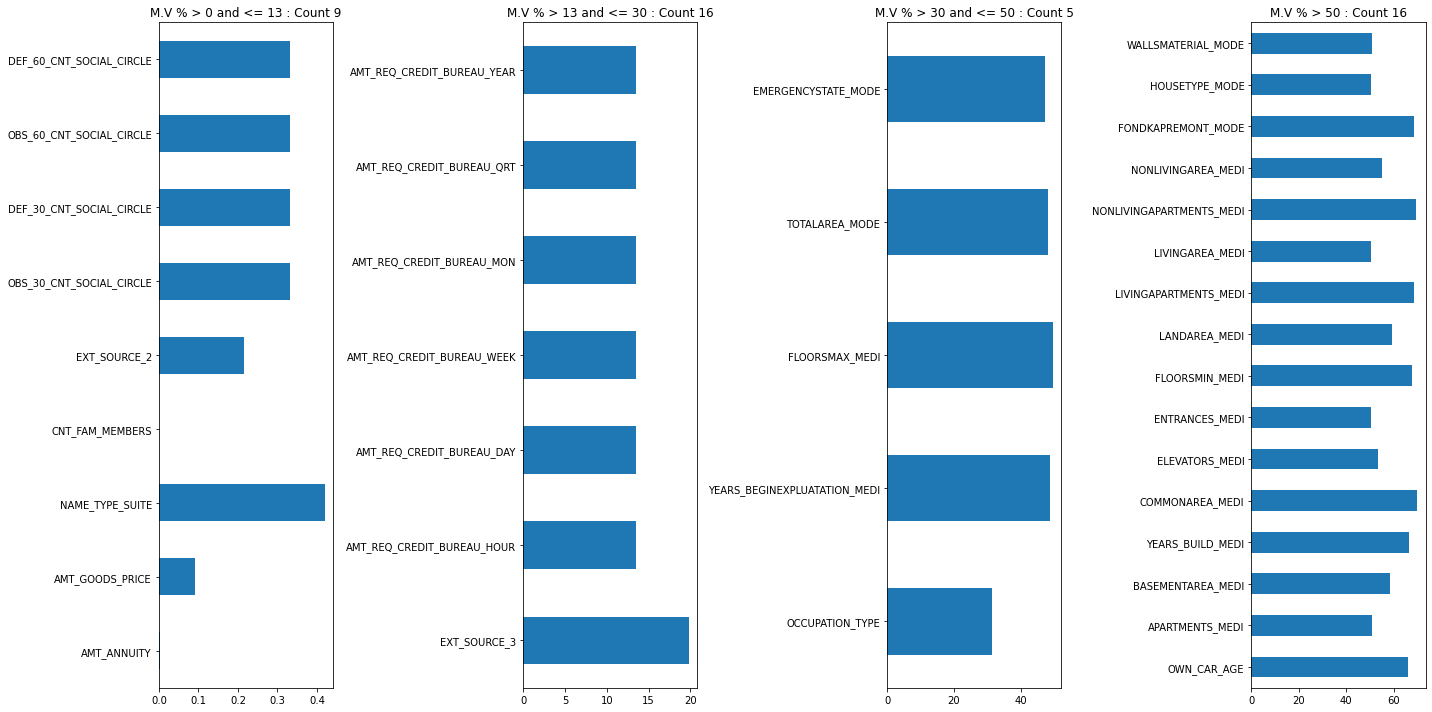

In [35]:
# To plot missing values percentage 

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
title_1 = "M.V % > 0 and <= 13 : Count {}".format(len(missing_value_percentage[missing_value_percentage <= 13]))                               
plt.title(title_1)
missing_value_percentage[missing_value_percentage <= 13].plot(kind="barh")
plt.subplot(1,4,2)
title_1 = "M.V % > 13 and <= 30 : Count {}".format(len(missing_value_percentage[missing_value_percentage <= 30]))                               
plt.title(title_1)
missing_value_percentage[np.logical_and(missing_value_percentage > 13 ,missing_value_percentage <= 30)].plot(kind="barh")
plt.subplot(1,4,3)
title_2 = "M.V % > 30 and <= 50 : Count {}".format(len(missing_value_percentage[np.logical_and(missing_value_percentage >30 ,missing_value_percentage <= 50)]))
plt.title(title_2)
missing_value_percentage[np.logical_and(missing_value_percentage >30 ,missing_value_percentage <= 50)].plot(kind="barh")
plt.subplot(1,4,4)
title_3 = "M.V % > 50 : Count {}".format(len(missing_value_percentage[missing_value_percentage > 50])) 
plt.title(title_3)
missing_value_percentage[missing_value_percentage > 50].plot(kind="barh")
plt.tight_layout()
plt.show()


### **<font color="#F08080">4.2 Reasons Analysis<br></font>**

Performing analysis on data with missing values <= 13%

<font color="teal">**4.2.1 AMT_ANNUTY**</font>

In [36]:
(len(application_data[application_data["AMT_ANNUITY"].isnull()])/len(application_data)) * 100

0.003902299429939092

For ~0.004 % (12 applications) of applications AMT_ANNUITY is not available<br>
Assuming either data collection or data entry issue caused this<br>


**Propsed Imputation for this is: Group the data by ["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE", "OCCUPATION_TYPE"] and find the respective AMT_ANNUITY median , then impute the missing value with that. For the imputation values please refer below dataframe.**

In [37]:
application_data[application_data["AMT_ANNUITY"].isnull()][["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE", "OCCUPATION_TYPE"]]

NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
47531   Commercial associate              Incomplete higher   
50035                Working                Lower secondary   
51594                Working  Secondary / secondary special   
55025          State servant               Higher education   
59934                Working  Secondary / secondary special   
75873                Working               Higher education   
89343          State servant  Secondary / secondary special   
123872               Working  Secondary / secondary special   
207186  Commercial associate               Higher education   
227939  Commercial associate               Higher education   
239329         State servant  Secondary / secondary special   
241835               Working               Higher education   

              OCCUPATION_TYPE  
47531   High skill tech staff  
50035                Laborers  
51594           Cooking staff  
55025              Core staff  
59934                Laborers  
75873                 Drivers  
89343          Medicine staff  
123872            Secretaries  
207186         Security staff  
227939            Sales staff  
239329               Managers  
241835            Accountants

In [38]:
 ms_1 = application_data.groupby(["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE", "OCCUPATION_TYPE"])[["AMT_INCOME_TOTAL","AMT_CREDIT", "AMT_ANNUITY"]].median() 

In [39]:
ms_1[ms_1["AMT_ANNUITY"].notnull()]

AMT_INCOME_TOTAL  \
NAME_INCOME_TYPE     NAME_EDUCATION_TYPE           OCCUPATION_TYPE                           
Businessman          Higher education              Core staff                    180000.00   
                                                   Managers                      675000.00   
Commercial associate Academic degree               Accountants                   159750.00   
                                                   Cleaning staff                 90000.00   
                                                   Core staff                    354600.00   
                                                   Drivers                       216000.00   
                                                   High skill tech staff         720000.00   
                                                   Laborers                      157500.00   
                                                   Managers                      247500.00   
                                                   Sales staff                   182250.00   
                                                   Security staff                225000.00   
                     Higher education              Accountants                   202500.00   
                                                   Cleaning staff                135000.00   
                                                   Cooking staff                 168750.00   
                                                   Core staff                    180000.00   
                                                   Drivers                       202500.00   
                                                   HR staff                      189092.25   
                                                   High skill tech staff         202500.00   
                                                   IT staff                      225000.00   
                                                   Laborers                      180000.00   
                                                   Low-skill Laborers            135000.00   
                                                   Managers                      270000.00   
                                                   Medicine staff                157500.00   
                                                   Private service staff         202500.00   
                                                   Realty agents                 202500.00   
                                                   Sales staff                   180000.00   
                                                   Secretaries                   171000.00   
                                                   Security staff                180000.00   
                                                   Waiters/barmen staff          180000.00   
                     Incomplete higher             Accountants                   180000.00   
                                                   Cleaning staff                166500.00   
                                                   Cooking staff                 180000.00   
                                                   Core staff                    157500.00   
                                                   Drivers                       202500.00   
                                                   HR staff                      180000.00   
                                                   High skill tech staff         180000.00   
                                                   IT staff                      202500.00   
                                                   Laborers                      180000.00   
                                                   Low-skill Laborers            180000.00   
                                                   Managers                      270000.00   
                                                   Medicine staff                146250.00   
                                

<font color="teal">**4.2.2 CNT_FAM_MEMBERS**</font>

In [40]:
(application_data.CNT_FAM_MEMBERS.isnull().sum()/ len(application_data)) * 100

0.0006503832383231819

**~ 0.00065 % (2) applications has CNT_FAM_MEMBERS value as null. We can impute missing values with mode of the same age people's family count. The mode value here it 2. so we can impute below two applications CNT_FAM_MEMBERS value to 2**

In [41]:
application_data[application_data.CNT_FAM_MEMBERS.isnull()].head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605      0    Revolving loans           M            N   
187348      317181      0    Revolving loans           F            N   

       FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y            0          450000.0    675000.0   
187348               Y            0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221       12396           1161   
187348                    0.031329       12844            232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE FLAG_EMP_PHONE  \
41982                3265             4489          NaN              1   
187348               1597             1571          NaN              1   

       FLAG_WORK_PHONE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
41982                1          1          0        Managers             NaN   
187348               0          0          0     Accountants             NaN   

       REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
41982                     2                           2   
187348                    2                           2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
41982                    THURSDAY                       15   
187348                     FRIDAY                       14   

       REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
41982                           0                          1   
187348                          0                          0   

       LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
41982                            1                      0   
187348                           0                      0   

       REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
41982                       1                       1               Insurance   
187348                      0                       0  Business Entity Type 2   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_MEDI  BASEMENTAREA_MEDI  \
41982       0.700618           NaN              NaN                NaN   
187348      0.645168      0.670652           0.1041             0.0467   

        YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  \
41982                            NaN               NaN              NaN   
187348                         0.997            0.9597           0.0082   

        ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  \
41982              NaN             NaN             NaN             NaN   
187348            0.08           0.069           0.375          0.4167   

        LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
41982             NaN                    NaN              NaN   
187348            NaN                 0.0855           0.0896   

        NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  \
41982                        NaN                 NaN                NaN   
187348                       0.0                 0.0   reg oper account   

        HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
41982              NaN             NaN                NaN                 NaN   
187348  block of flats          0.0791              Panel                  No   

       OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
41982                       3.0                      0.0   
187348                      1.

In [42]:
application_data[np.logical_and(application_data.DAYS_BIRTH > 12000 , application_data.DAYS_BIRTH < 13000)]["CNT_FAM_MEMBERS"].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: category
Categories (17, float64): [1.0, 2.0, 3.0, 4.0, ..., 14.0, 15.0, 16.0, 20.0]

In [43]:
application_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

<font color="teal">**4.2.3 AMT_GOODS_PRICE**</font>

In [44]:
(application_data.AMT_GOODS_PRICE.isnull().sum() / len(application_data)) * 100

0.09040327012692229

~0.09 %(278) applications don't have value.

In [45]:
application_data[application_data.AMT_GOODS_PRICE.isnull()].head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837      0    Revolving loans           F            N   
5937      106955      0    Revolving loans           F            N   
6425      107494      0    Revolving loans           F            N   
6703      107822      0    Revolving loans           F            N   
7647      108913      0    Revolving loans           M            N   

     FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y            2           45000.0    135000.0       6750.0   
5937               N            0          157500.0    450000.0      22500.0   
6425               N            0           67500.0    202500.0      10125.0   
6703               N            1          121500.0    180000.0       9000.0   
7647               Y            0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724               NaN             NaN  Commercial associate   
5937              NaN             NaN               Working   
6425              NaN             NaN               Working   
6703              NaN             NaN               Working   
7647              NaN             NaN               Working   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724   Secondary / secondary special               Married  House / apartment   
5937  Secondary / secondary special               Married  House / apartment   
6425               Higher education               Married  House / apartment   
6703  Secondary / secondary special        Civil marriage  House / apartment   
7647               Higher education  Single / not married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                     0.024610       10072            381   
5937                    0.010006       11993           2921   
6425                    0.008474        9727           2712   
6703                    0.011657       11079            899   
7647                    0.032561        9986           1847   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE FLAG_EMP_PHONE  \
724                 519             1834          NaN              1   
5937               1289             1948          NaN              1   
6425               4132              800          NaN              1   
6703               3765              572          NaN              1   
7647               4762              506          NaN              1   

     FLAG_WORK_PHONE FLAG_PHONE FLAG_EMAIL        OCCUPATION_TYPE  \
724                1          0          0             Core staff   
5937               1          1          1  Private service staff   
6425               1          1          0            Accountants   
6703               1          1          0               Managers   
7647               1          1          0         Security staff   

     CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
724              4.0                    2                           2   
5937             2.0                    2                           2   
6425             2.0                    2                           2   
6703             3.0                    1                           1   
7647             1.0                    1                           1   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
724                   WEDNESDAY                       14   
5937                   SATURDAY                       13   
6425                  WEDNESDAY                       18   
6703                  WEDNESDAY                       11   
7647                   SATURDAY                       18   

     REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
724                           0                          0   
5937                          0                          0   
6425                     

In [46]:
application_data[application_data.AMT_GOODS_PRICE.isnull()]["NAME_CONTRACT_TYPE"]

724       Revolving loans
5937      Revolving loans
6425      Revolving loans
6703      Revolving loans
7647      Revolving loans
7880      Revolving loans
7995      Revolving loans
10819     Revolving loans
11287     Revolving loans
13008     Revolving loans
14699     Revolving loans
15953     Revolving loans
18935     Revolving loans
19178     Revolving loans
19921     Revolving loans
21193     Revolving loans
21338     Revolving loans
21546     Revolving loans
25391     Revolving loans
26398     Revolving loans
26736     Revolving loans
27003     Revolving loans
28201     Revolving loans
29059     Revolving loans
30164     Revolving loans
30294     Revolving loans
32143     Revolving loans
36250     Revolving loans
36721     Revolving loans
39230     Revolving loans
40571     Revolving loans
41099     Revolving loans
41161     Revolving loans
41982     Revolving loans
42024     Revolving loans
43630     Revolving loans
45657     Revolving loans
47627     Revolving loans
50540     Re

In [47]:
application_data[application_data.NAME_CONTRACT_TYPE == "Revolving loans"]["AMT_GOODS_PRICE"].median()

270000.0

**All applications, NAME_CONTRACT_TYPE is "Revolving loans". So, we can impute AMT_GOODS_PRICE with  median of Revolving Loans**

<font color="teal">**EXT_SOURCE_2**</font>

In [48]:
(application_data.EXT_SOURCE_2.isnull().sum()/len(application_data)) * 100

0.21462646864665005

~0.21%(660) of applications don't have EXT_SOURCE_2 info. 

In [49]:
application_data[application_data.EXT_SOURCE_2.isnull()].TARGET.value_counts()

0    608
1     52
Name: TARGET, dtype: int64

In [50]:
application_data[application_data.TARGET == 1]['EXT_SOURCE_2'].median()

0.44038063037638375

In [51]:
application_data[application_data.TARGET == 0]['EXT_SOURCE_2'].median()

0.5739046869026359

**we can impute values with Median of EXT_SOURCE_2 with respective to TARGET (group the target by value , then find the median for each group). If the applicant facing difficulty paying annuity then impute it with 0.44 , else 0.573** 

<font color="teal">**NAME_TYPE_SUITE**</font>

In [52]:
(application_data.NAME_TYPE_SUITE.isnull().sum()/len(application_data)) * 100

0.42014757195677555

In [53]:
application_data.NAME_TYPE_SUITE.isnull().sum()

1292

In [54]:
application_data.groupby(["NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS"])["NAME_TYPE_SUITE"].value_counts()

NAME_FAMILY_STATUS    CNT_FAM_MEMBERS  NAME_TYPE_SUITE
Civil marriage        2.0              Unaccompanied      17019
                                       Family              2634
                                       Spouse, partner      847
                                       Children             131
                                       Other_B              112
                                       Other_A              102
                                       Group of people       21
                      3.0              Unaccompanied       5293
                                       Family               804
                                       Spouse, partner      302
                                       Children              87
                                       Other_B               39
                                       Other_A               35
                                       Group of people        6
                      4.0              Unaccompan

**We can impute  missing values  with  mode of ["NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS", "NAME_TYPE_SUITE"] group.**

## **<font color="sky blue">5. Outlier Analysis</font>**

### **<font color="#F08080">5.1 Identification of Outlier Data</font>**

In step 2.10 observer outliers in,
DAYS_EMPLOYED<br>
AMT_INCOME_TOTAL<br>
DAYS_REGISTRATION<br>
REGION_POPULATION_RELATIVE<br>
OWN_CAR_AGE<br>
AMT_CREDIT<br>
AMT_ANNUITY<br>

### **<font color="#F08080">5.2.Outlier Analysis on Selected Data</font>**

<font color="teal">**Univarient Outliers analysis on DAYS_EMPLOYED**</font>

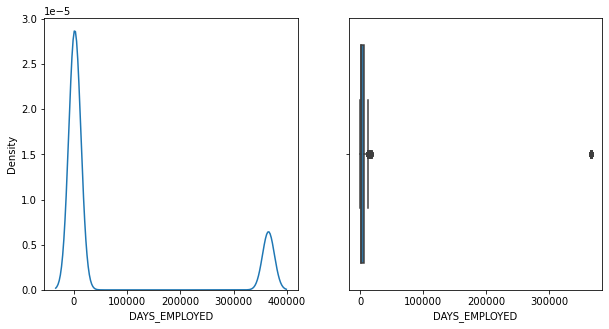

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(application_data["DAYS_EMPLOYED"], hist=False)
plt.subplot(1,2,2)
sns.boxplot(application_data["DAYS_EMPLOYED"])
plt.show()


**Found two peaks in data distribution. The lowest peak at 350000 clearly indicating outlier. We should do the further analysis to 
understand nature of this data. Is the data entry mistake or any other reason invoved for this data distribution.**

approach 1: Find max value in this column.<br>
            max value si 365243<br>
            % of this data ?
            it is 18% of the data which is pretty high for continuous attribute<br>

Note : 365243 days ~ 999.0. <br>
       Practically not a possible value<br>
       So Need a further analysis<br>
approach 2: Finding NAME_INCOME_TYPE of these application(DAYS_EMPLOYED == 365243)<br>
            Found Pensioner(55352) and Unemployed(22)<br>
Hence, Not applicable values set to large number(999.0 years)<br>

In [56]:
print("Max of in Days Employed is : ",application_data["DAYS_EMPLOYED"].max())
print("finding number of application with max value: ", len(application_data[application_data["DAYS_EMPLOYED"] == 365243]))
print("Percentage of data this value represents in dataset:", (len(application_data[application_data["DAYS_EMPLOYED"] == 365243])/len(application_data))*100)


Max of in Days Employed is :  365243
finding number of application with max value:  55374
Percentage of data this value represents in dataset: 18.00716071945394


In [57]:

# To find the income type of application DAYS_EMPLOYED >=365343
application_data[application_data["DAYS_EMPLOYED"] >= 365243]['NAME_INCOME_TYPE'].value_counts()

Pensioner               55352
Unemployed                 22
Working                     0
Student                     0
State servant               0
Maternity leave             0
Commercial associate        0
Businessman                 0
Name: NAME_INCOME_TYPE, dtype: int64

<font color="teal">**Univarient Outliers analysis on AMT_INCOME_TOTAL**</font> 

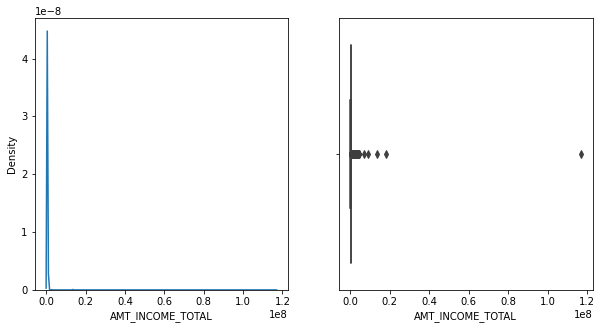

In [58]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(application_data["AMT_INCOME_TOTAL"], hist=False)
plt.subplot(1,2,2)
sns.boxplot(application_data["AMT_INCOME_TOTAL"])
plt.show()



**Large positive skewness indicating outliers. But seems outlier data is pretty small. We do the further analysis to 
understand nature of this data. Is the data entry mistake or any other reason invoved for this data distribution.**

approch 1: Finding max value of the data column<br>
           Found this values as 117000000<br>
           Finding number percentage of this data(values set to 117000000)<br>
After observing the data presented in the application. Seems like a data entry issue<br>
Note: Assumption :  With huge  income it pretty rare to face difficulty in paying annuity 26194.5<br>
    
Found many local peaks. Data showing categorical nature. Maybe we can perform binning(LOW< MEDIUM, HIGH]


In [59]:
               
print("Max Income : ",application_data["AMT_INCOME_TOTAL"].max())
print("finding number of application with max value: ", len(application_data[application_data["AMT_INCOME_TOTAL"] == 117000000]))
print("Percentage of data this value represents in dataset:", (len(application_data[application_data["DAYS_EMPLOYED"] == 117000000])/len(application_data))*100)



Max Income :  117000000.0
finding number of application with max value:  1
Percentage of data this value represents in dataset: 0.0


In [60]:
application_data[application_data["AMT_INCOME_TOTAL"] == 117000000.0].head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967      1         Cash loans           F            N   

      FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
12840               Y            1       117000000.0    562491.0      26194.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643       12615            922   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE FLAG_EMP_PHONE  \
12840               6762             3643          NaN              1   

      FLAG_WORK_PHONE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
12840               0          0          0        Laborers             3.0   

      REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
12840                    2                           2   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
12840                    TUESDAY                       14   

      REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
12840                          0                          0   

      LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
12840                           0                      0   

      REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
12840                      0                       0  Business Entity Type 3   

       EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_MEDI  BASEMENTAREA_MEDI  \
12840      0.113161      0.145543           0.1041             0.0947   

       YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  \
12840                        0.9791               NaN              NaN   

       ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  \
12840             0.0          0.2069          0.1667             NaN   

       LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
12840           0.07                    NaN           0.0626   

       NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  \
12840                       NaN                 NaN                NaN   

       HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
12840  block of flats          0.0715       Stone, brick                  No   

      OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
12840                      0.0                      0.0   

      OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
12840                      0.0                      0.0   

       DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_3 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6  \
12840                       0               1               0               0   

      FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_16 FLAG_DOCUMENT_18  \
12840               0               0                0                0   

      AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
12840                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
12840                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
12840                       0.0                        1.0

**Note**: Plotting 0.99 of data for better view

In [61]:

#To find 95 percentile value
application_data[application_data["AMT_INCOME_TOTAL"] < 117000000.0]["AMT_INCOME_TOTAL"].quantile(0.99)


472500.0

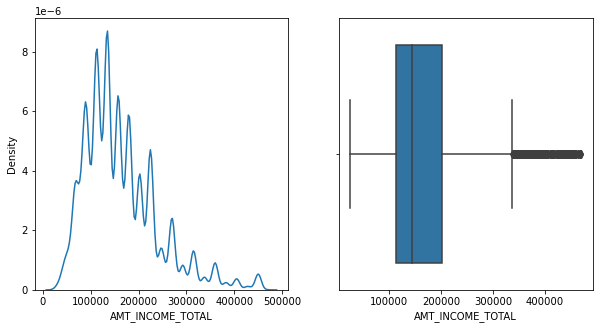

In [62]:

# TO find 95 percentile data distribution

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(application_data[application_data["AMT_INCOME_TOTAL"] < 472500.0]["AMT_INCOME_TOTAL"], hist=False)
plt.subplot(1,2,2)
sns.boxplot(application_data[application_data["AMT_INCOME_TOTAL"] < 472500.0]["AMT_INCOME_TOTAL"])
plt.show()

<font color="teal">**Univarient Outliers analysis on DAYS_REGISTRATION** </font>

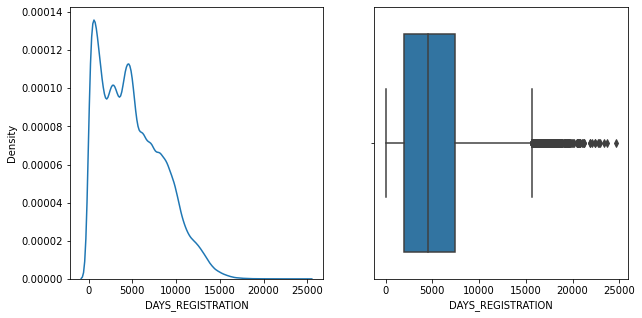

In [63]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(application_data["DAYS_REGISTRATION"], hist=False)
plt.subplot(1,2,2)
sns.boxplot(application_data["DAYS_REGISTRATION"])
plt.show()


**Negative skewness. Flatness on the x axis showing outlier presence. But seems not must outlier data.
We do the further analysis to understand nature of this data. Is the data entry mistake or any other reason invoved for this data distribution.**

approach 1: Finding minimum value<br>
            Found this value as -24672.0. Which represents 67.6 years(How can someone register for 67. years??)<br>
            Finding percentage of this data(value as -24672.0)<br>
            Found only 1 application<br>
            FOund age of the applicant and registration are same. May be data entry issue<br>

In [64]:

application_data["DAYS_REGISTRATION"].min()


0

In [65]:
24672/365

67.59452054794521

In [66]:
len(application_data[application_data["DAYS_REGISTRATION"] <= -24672])

0

In [67]:
application_data[application_data["DAYS_REGISTRATION"] <= -24672].head()

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_3, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_16, FLAG_DOCUMENT_18, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [68]:
application_data[application_data["DAYS_REGISTRATION"] <= -24672]["DAYS_BIRTH"]

Series([], Name: DAYS_BIRTH, dtype: int64)

In [69]:
24790/365

67.91780821917808

<font color="teal">**Univarient Outliers analysis on REGION_POPULATION_RELATIVE**</font>

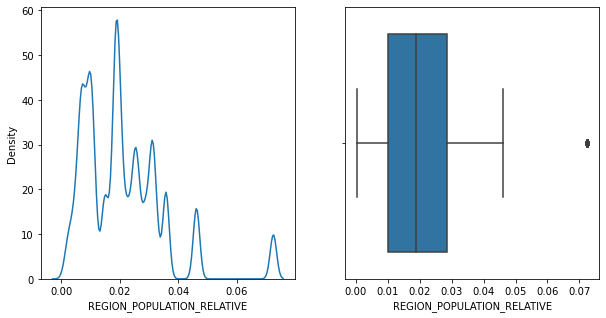

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(application_data["REGION_POPULATION_RELATIVE"], hist=False)
plt.subplot(1,2,2)
sns.boxplot(application_data["REGION_POPULATION_RELATIVE"])
plt.show()

**Seems few outliers present. But seems outlier data is pretty small. We do the further analysis to 
understand nature of this data. Is the data entry mistake or any other reason invoved for this data distribution.
Seems like , less apllications from dense  populationr region.**

Binning???

In [71]:

# TO find normalized score of dense regionin applications
application_data["REGION_POPULATION_RELATIVE"].max()

0.072508

In [72]:
              
print("Population Desnce score : ",application_data["REGION_POPULATION_RELATIVE"].max())
print("finding number of application with max value: ", len(application_data[application_data["REGION_POPULATION_RELATIVE"] ==  0.072508]))
print("Percentage of data this value represents in dataset:", (len(application_data[application_data["REGION_POPULATION_RELATIVE"] ==  0.072508])/len(application_data))*100)


Population Desnce score :  0.072508
finding number of application with max value:  8412
Percentage of data this value represents in dataset: 2.735511900387303


<font color="teal">**Univarient Outliers analysis on OWN_CAR_AGE**</font>

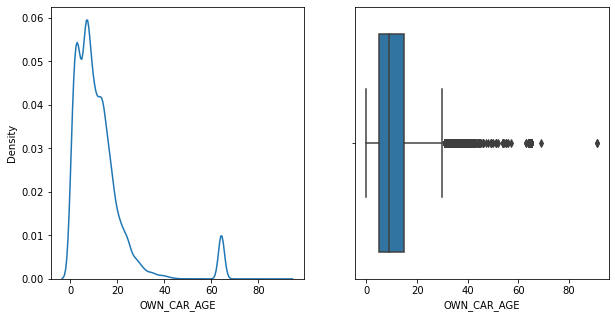

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(application_data["OWN_CAR_AGE"], hist=False)
plt.subplot(1,2,2)
sns.boxplot(application_data["OWN_CAR_AGE"])
plt.show()



**Large possitive skewness indicating outliers. But seems outlier data is pretty small. We do the further analysis to 
understand nature of this data. Is the data entry mistake or any other reason invoved for this data distribution.**

approach 1: Finding 95 percentile value<br>
            Found . it is 30<br>
            Finding number of applications with car age >=30. Found it is 1.7% of the data<br>
            Finding Occupation of applicants and Income of the applicant<Br>
            Not able to find any relationship between car age and other attributes<br>
            Oh, How can a age of the car be more than 30 years. Are these people have vintage car???<br>
            Seems like a invalid data. May be a Issue in data collection process<Br>


In [74]:
# Find the 95 percentile value
application_data["OWN_CAR_AGE"].quantile(0.95)

30.0

In [75]:
# to find the max value
application_data["OWN_CAR_AGE"].max()

91.0

In [76]:

print("finding number of applications in above 95 percentile: ", len(application_data[application_data["OWN_CAR_AGE"] >= 30.0]))
print("Percentage of data fall under this category:", (len(application_data[application_data["OWN_CAR_AGE"] >=  30.0])/len(application_data))*100)
print("Percentage of data with max value:", (len(application_data[application_data["OWN_CAR_AGE"] >=  91])/len(application_data))*100)


finding number of applications in above 95 percentile:  5258
Percentage of data fall under this category: 1.7098575335516453
Percentage of data with max value: 0.0006503832383231819


In [77]:

# to get income details
application_data[application_data["OWN_CAR_AGE"] >= 30.0]["AMT_INCOME_TOTAL"].describe()


count    5.258000e+03
mean     1.642035e+05
std      8.282603e+04
min      2.700000e+04
25%      1.125000e+05
50%      1.530000e+05
75%      2.025000e+05
max      1.800000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [78]:
# to find application with car age > 91
application_data[application_data["OWN_CAR_AGE"] > 91].head()


Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_3, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_16, FLAG_DOCUMENT_18, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

<font color="teal">**Univarient Outliers analysis on AMT_CREDIT**</font>

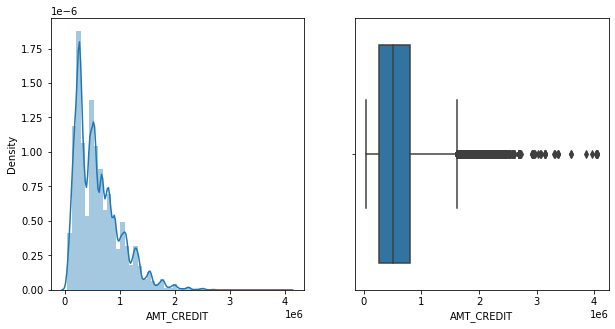

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(application_data["AMT_CREDIT"] )
plt.subplot(1,2,2)
sns.boxplot(application_data["AMT_CREDIT"])
plt.show()



**Large possitive skewness indicating outliers. But seems outlier data is pretty small. We do the further analysis to 
understand nature of this data. Is the data entry mistake or any other reason invoved for this data distribution.**


There is chance that few people might have taken highest credit.

In [80]:

application_data["AMT_CREDIT"].quantile(0.95)

1350000.0

In [81]:

len(application_data[application_data["AMT_CREDIT"] > 1350000.0])

14034

In [82]:
len(application_data[application_data["AMT_CREDIT"] > 3500000])

14

In [83]:

application_data[application_data["AMT_CREDIT"] > 3500000].head(10)

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
14643       117085      0         Cash loans           F            Y   
14852       117337      0         Cash loans           M            N   
17948       120926      0         Cash loans           M            Y   
53936       162494      0         Cash loans           M            Y   
95571       210956      0         Cash loans           M            N   
104577      221360      0         Cash loans           M            Y   
110459      228135      0         Cash loans           M            N   
119380      238431      0         Cash loans           F            Y   
119681      238782      0         Cash loans           M            Y   
120757      240007      0         Cash loans           M            N   

       FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
14643                N            2          749331.0   3956274.0   
14852                Y            1          760846.5   4050000.0   
17948                N            2          783000.0   4050000.0   
53936                N            0          900450.0   3600000.0   
95571                Y            0          430650.0   4031032.5   
104577               N            0          468000.0   3600000.0   
110459               N            2          864900.0   4050000.0   
119380               N            0          292050.0   3860019.0   
119681               Y            1          931365.0   4050000.0   
120757               N            0          587250.0   4050000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
14643      197230.5        3825000.0   Unaccompanied  Commercial associate   
14852      146002.5        4050000.0   Unaccompanied  Commercial associate   
17948      258025.5        4050000.0   Unaccompanied  Commercial associate   
53936       91008.0        3600000.0   Unaccompanied  Commercial associate   
95571      102033.0        3712500.0   Unaccompanied               Working   
104577      91138.5        3600000.0             NaN         State servant   
110459     102384.0        4050000.0   Unaccompanied  Commercial associate   
119380      97578.0        3555000.0   Unaccompanied  Commercial associate   
119681     102514.5        4050000.0   Unaccompanied  Commercial associate   
120757     106969.5        4050000.0   Unaccompanied  Commercial associate   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
14643     Higher education               Married  House / apartment   
14852     Higher education               Married   Office apartment   
17948     Higher education               Married  House / apartment   
53936     Higher education  Single / not married  House / apartment   
95571     Higher education  Single / not married  House / apartment   
104577    Higher education               Married  House / apartment   
110459    Higher education               Married  House / apartment   
119380    Higher education               Married  House / apartment   
119681    Higher education               Married  House / apartment   
120757    Higher education               Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
14643                     0.030755       19161            989   
14852                     0.072508       12796           1372   
17948                     0.009549       15176            201   
53936                     0.032561       13582           1250   
95571                     0.035792       16475            299   
104577                    0.010147       11202           2590   
110459                    0.025164       14940            632   
119380                    0.016612       14187           1596   
119681                    0.030755       12536            681   
120757                    0.046220       19893            421   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE FLAG_EMP_PHONE  \
14643        

In [84]:

application_data[application_data["AMT_CREDIT"] < 3500000]["AMT_CREDIT"].quantile(0.95)


1350000.0

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

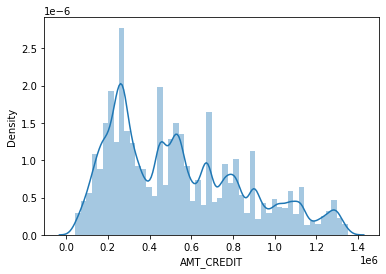

In [85]:

sns.distplot(application_data[application_data["AMT_CREDIT"] < 1350000.0]["AMT_CREDIT"])


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

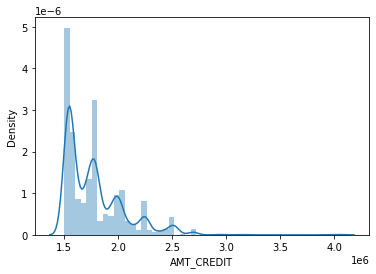

In [86]:

sns.distplot(application_data[application_data["AMT_CREDIT"] > 1500000]["AMT_CREDIT"])


<font color="teal">**Univarient Outliers analysis on AMT_ANNUITY**</font>

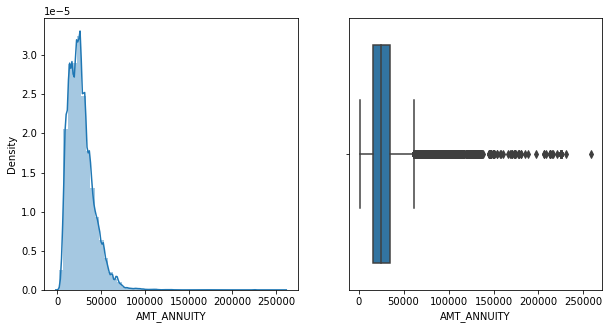

In [87]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(application_data["AMT_ANNUITY"] )
plt.subplot(1,2,2)
sns.boxplot(application_data["AMT_ANNUITY"])
plt.show()


**Large possitive skewness indicating outliers. But seems outlier data is pretty small. We do the further analysis to 
understand nature of this data. Is the data entry mistake or any other reason invoved for this data distribution.**

approach 1: Finding 95 percentile value<br>
            Found . Tt is set to 53325<br>
            Finding number of applications with car age >=53325. Found it is 5% of the data<br>
            5% of the applicants are paying high annuity<br>
            There is clearly one outlier stand out in the data<Br>
            Application with annuity =  258025.5 might bea data entry issue<br>
            Commerical Associates and Working people went wiht highest annuity


In [88]:
application_data["AMT_ANNUITY"].quantile(0.95)

53325.0

In [89]:
len(application_data[application_data["AMT_ANNUITY"] > 53325.0])

15340

In [90]:

(len(application_data[application_data["AMT_ANNUITY"] > 53325.0])/len(application_data)) * 100


4.988439437938806

In [91]:
application_data["AMT_ANNUITY"].max()

258025.5

In [92]:
application_data[application_data["AMT_ANNUITY"] >= 258025.5].head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
17948      120926      0         Cash loans           M            Y   

      FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
17948               N            2          783000.0   4050000.0     258025.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
17948        4050000.0   Unaccompanied  Commercial associate   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
17948    Higher education            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
17948                    0.009549       15176            201   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE FLAG_EMP_PHONE  \
17948               1529             4722          1.0              1   

      FLAG_WORK_PHONE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
17948               1          0          1        Managers             4.0   

      REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
17948                    2                           2   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
17948                   THURSDAY                       14   

      REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
17948                          1                          1   

      LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
17948                           0                      1   

      REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
17948                      1                       1  Industry: type 4   

       EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_MEDI  BASEMENTAREA_MEDI  \
17948      0.706927      0.553165           0.0468             0.0594   

       YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  \
17948                        0.9851            0.7987              NaN   

       ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  \
17948             0.0          0.1034          0.1667             NaN   

       LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
17948         0.0256                 0.0385           0.0429   

       NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  \
17948                       NaN              0.0118   org spec account   

       HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
17948  block of flats          0.0356       Stone, brick                  No   

      OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
17948                      0.0                      0.0   

      OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
17948                      0.0                      0.0   

       DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_3 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6  \
17948                       5               0               0               0   

      FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_16 FLAG_DOCUMENT_18  \
17948               0               0                0                0   

      AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
17948                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
17948                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
17948                       0.0                        0.0

In [93]:

application_data[application_data["AMT_ANNUITY"] > 150000]['NAME_EDUCATION_TYPE'].value_counts()


Higher education                 57
Secondary / secondary special    10
Incomplete higher                 1
Lower secondary                   0
Academic degree                   0
Name: NAME_EDUCATION_TYPE, dtype: int64

In [94]:

application_data[application_data["AMT_ANNUITY"] > 150000]['NAME_INCOME_TYPE'].value_counts()


Commercial associate    41
Working                 12
State servant            7
Pensioner                7
Businessman              1
Unemployed               0
Student                  0
Maternity leave          0
Name: NAME_INCOME_TYPE, dtype: int64

In [95]:

application_data[application_data["AMT_ANNUITY"] < 150000]['AMT_INCOME_TOTAL'].quantile(0.95)


337500.0

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

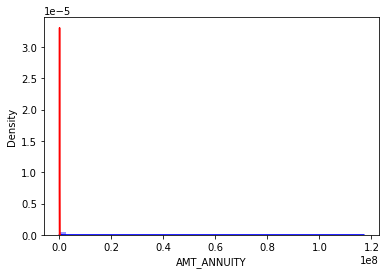

In [96]:

sns.distplot(application_data[application_data["AMT_ANNUITY"] < 337500.0]['AMT_INCOME_TOTAL'],color="blue")
sns.distplot(application_data[application_data["AMT_ANNUITY"] < 337500.0]['AMT_ANNUITY'], color="red")


<font color="teal">**Bivariant Outliers analysis on AMT_CREDIT and INCOME**</font>

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

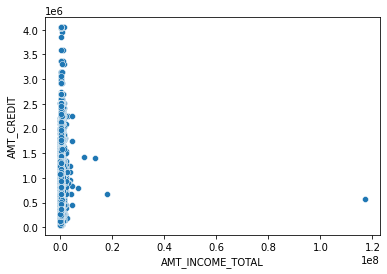

In [97]:

sns.scatterplot(x=application_data.AMT_INCOME_TOTAL, y=application_data.AMT_CREDIT)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

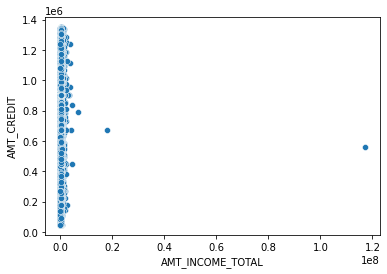

In [98]:

application_data[application_data["AMT_CREDIT"] > 3500000]
sns.scatterplot(x=application_data[application_data["AMT_CREDIT"] < 1350000].AMT_INCOME_TOTAL, y=application_data[application_data["AMT_CREDIT"] < 1350000].AMT_CREDIT)


## **<font color="sky blue">6. Data Creation</font>**

### **<font color="#F08080">6.1 Binning</font>**

As mentioned above observations, AMT_CREDIT, AMT_INCOME_TOTAL has many local peaks. so we can convert these columns to categorical columsn

In [99]:
application_data['AMT_CREDIT_BINS'] = pd.cut(application_data.AMT_CREDIT, bins = [
                                                                    application_data.AMT_CREDIT.quantile(0.0),
                                                                    application_data.AMT_CREDIT.quantile(0.25),
                                                                    application_data.AMT_CREDIT.quantile(0.50), 
                                                                    application_data.AMT_CREDIT.quantile(0.75),
                                                                    application_data.AMT_CREDIT.quantile(1),
                                                                    ], 
                                           
                               labels = ['LOW', 'MEDIUM', 'LARGE', "Very Large"])

application_data['AMT_INCOME_TOTAL_BINS'] = pd.cut(application_data.AMT_INCOME_TOTAL, bins = [
                                                                    application_data.AMT_INCOME_TOTAL.quantile(0.0),
                                                                    application_data.AMT_INCOME_TOTAL.quantile(0.25),
                                                                    application_data.AMT_INCOME_TOTAL.quantile(0.50), 
                                                                    application_data.AMT_INCOME_TOTAL.quantile(0.75),
                                                                    application_data.AMT_INCOME_TOTAL.quantile(1)], 
                                           
                               labels = ['LOW', 'MEDIUM', 'HIGH', "Very High"])

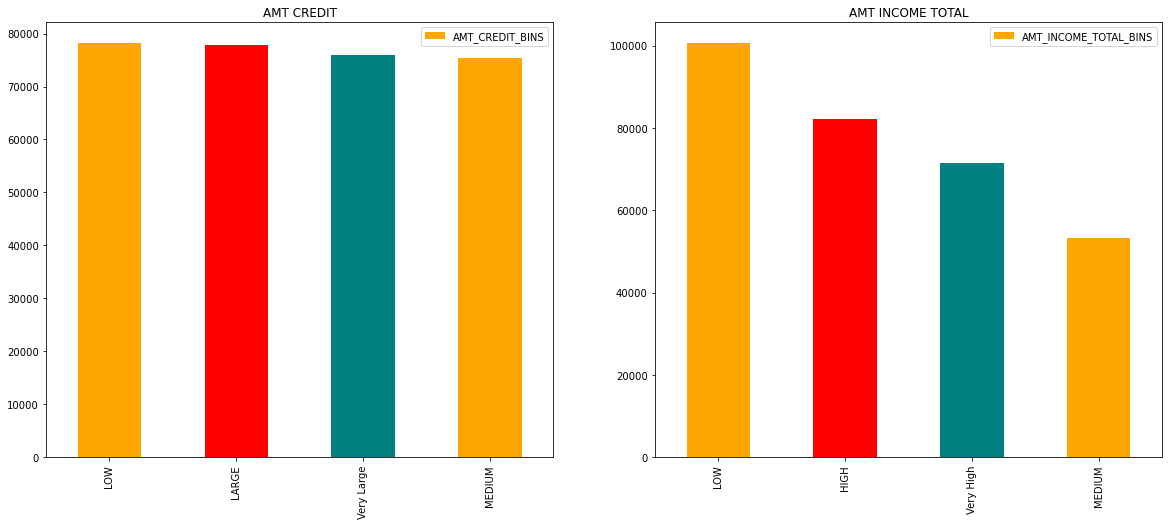

In [100]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("AMT CREDIT")
application_data['AMT_CREDIT_BINS'].value_counts().plot(kind="bar", color=["orange","Red", "teal"], legend=True)

plt.subplot(1,2,2)
plt.title("AMT INCOME TOTAL")
application_data['AMT_INCOME_TOTAL_BINS'].value_counts().plot(kind="bar", color=["orange","Red", "teal"],  legend=True)

plt.show()


**Observations**:<br>
AMT CREDIT dibribution is almost uniform among all categories<br>
Received more application from low income group, then high income group, followed by very high and medium income groups
                  

## **<font color="sky blue">7. Data Analysis and Pattern Identification</font>**

### **<font color="#F08080">7.1 Target Data Balanced or Imbalanced?</font>**

<AxesSubplot:title={'center':'Imbalance of in TARGET'}>

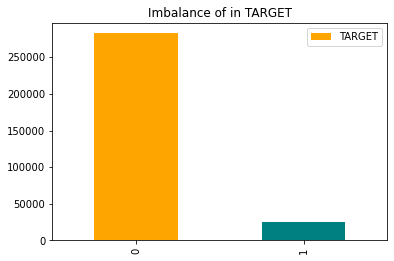

In [101]:
plt.title("Imbalance of in TARGET")
application_data.TARGET.value_counts().plot(kind="bar", legend=True, color=["orange","teal"])

In [102]:
len(application_data[application_data.TARGET==0]) / len(application_data) * 100

91.92711805431351

~ 8% people are facing difficulty in paying annuity at this at the time of this dataset created. Imbalance is pretty high is TARGET variable

### **<font color="#F08080">7.2 Data Isolation Based on Target Variable</font>**

**Create target_defficulty and targe_normal datasets form the application_data target_difficulty data set should contain only  applications which has TARGET value 1. Target_normal data set should contain only applications whixh has TARGET value 0** 

In [103]:
target_difficulty = application_data[application_data.TARGET==1]
target_normal = application_data[application_data.TARGET==0]

### **<font color="#F08080">7.3 Univariant Analysis on Categorical Data with respective to Target</font>**

<font color='teal'>**CODE_GENDER**</font>

<AxesSubplot:title={'center':'GENDER vs TARGET 0'}, xlabel='CODE_GENDER', ylabel='count'>

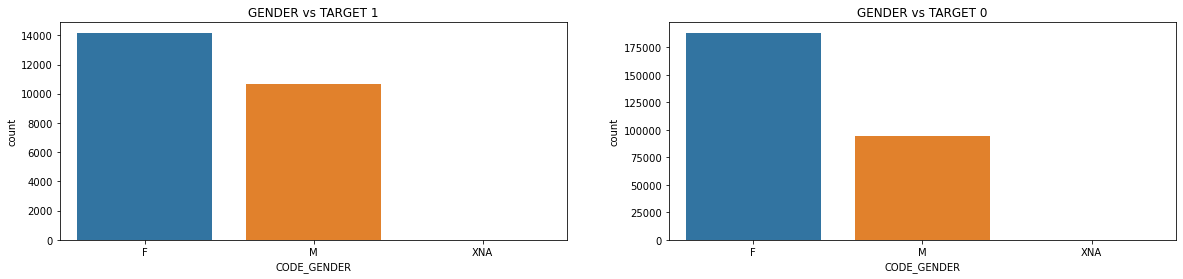

In [104]:
## Univariate for categorical CODE_GENDER
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("GENDER vs TARGET 1")
sns.countplot(target_difficulty.CODE_GENDER)

plt.subplot(1,2,2)
plt.title("GENDER vs TARGET 0")
sns.countplot(target_normal.CODE_GENDER)

****Observations:****: 
Number of Females defaulters are quite higher. But we need to consider the fact that number of female applicants are also higher in data.
If we observe Female distribution is same in both the dataset .But males defficutly bar is quite higher than normal bar.
So, Came to an conslusion that males are facing quite a problem in repaying than females

<font color="teal">**NAME_INCOME_TYPE**</font>

In [105]:
target_normal.NAME_INCOME_TYPE.value_counts().index.categories

Index(['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner',
       'State servant', 'Student', 'Unemployed', 'Working'],
      dtype='object')

[Text(0, 0, 'Working'),
 Text(1, 0, 'Commercial associate'),
 Text(2, 0, 'Pensioner'),
 Text(3, 0, 'State servant'),
 Text(4, 0, 'Unemployed'),
 Text(5, 0, 'Maternity leave'),
 Text(6, 0, 'Student'),
 Text(7, 0, 'Businessman')]

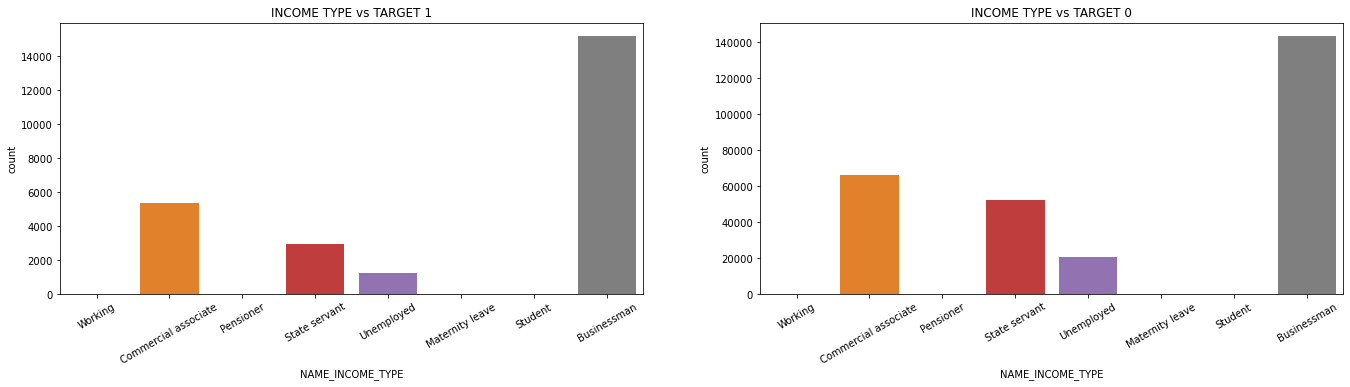

In [106]:
## Univariate for categorical NAME_CONTRACT_TYPE
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("INCOME TYPE vs TARGET 1")
f1 = sns.countplot(target_difficulty.NAME_INCOME_TYPE)
f1.set_xticklabels(labels=['Working', 'Commercial associate', 'Pensioner',
                  'State servant', 'Unemployed', 'Maternity leave', 'Student',
                  'Businessman'], rotation=30)
plt.subplot(1,2,2)
plt.title("INCOME TYPE vs TARGET 0")
f2 = sns.countplot(target_normal.NAME_INCOME_TYPE)
f2.set_xticklabels(labels=['Working', 'Commercial associate', 'Pensioner',
                  'State servant', 'Unemployed', 'Maternity leave', 'Student',
                  'Businessman'], rotation=30)

****Observations:**** <br>
Received more applicantions from Business. Followed by Commercial Associate, state Servent, unemployed people respectively 

<font color="teal">**NAME_EDUCATION_TYPE**</font>

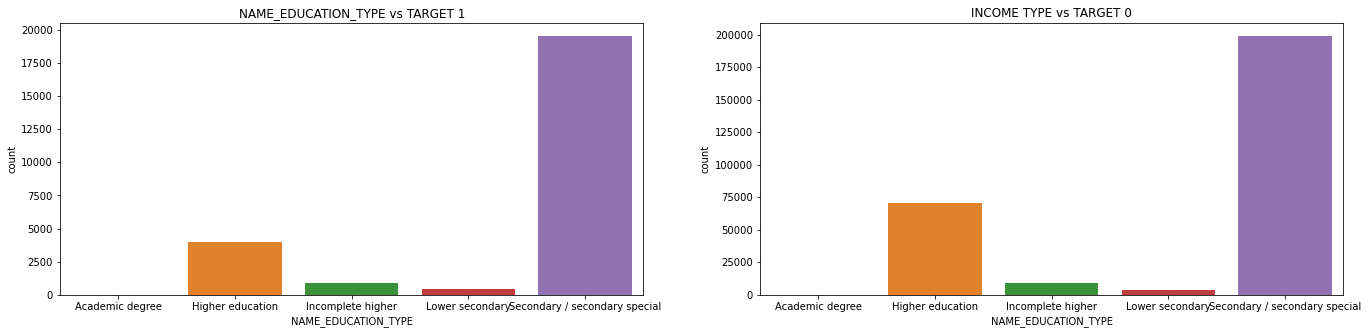

In [107]:
## Univariate for categorical NAME_EDUCATION_TYPE
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("NAME_EDUCATION_TYPE vs TARGET 1")
f1 = sns.countplot(target_difficulty.NAME_EDUCATION_TYPE)
# f1.set_xticklabels(labels=target_difficulty.NAME_EDUCATION_TYPE.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("INCOME TYPE vs TARGET 0")
f2 = sns.countplot(target_normal.NAME_EDUCATION_TYPE)
# f2.set_xticklabels(labels=target_normal.NAME_EDUCATION_TYPE.value_counts().index, rotation=30)

****Observation:**** Secondary/Secondary Special and  Higher Education  applicants are more. Higher edication applicants facing less difficulty than secondary education applicants. But still these people also facing difficulty  in repaying. <br>

There is no much data to support. But seems Lower Secondary Education people are actually facing difficulty<br>
Lower secondary bar in TARGET 1 is bit higher tha TARGET 0

<font color="teal">**NAME_CONTRACT_TYPE**</font>

[Text(0, 0, 'Cash loans'), Text(1, 0, 'Revolving loans')]

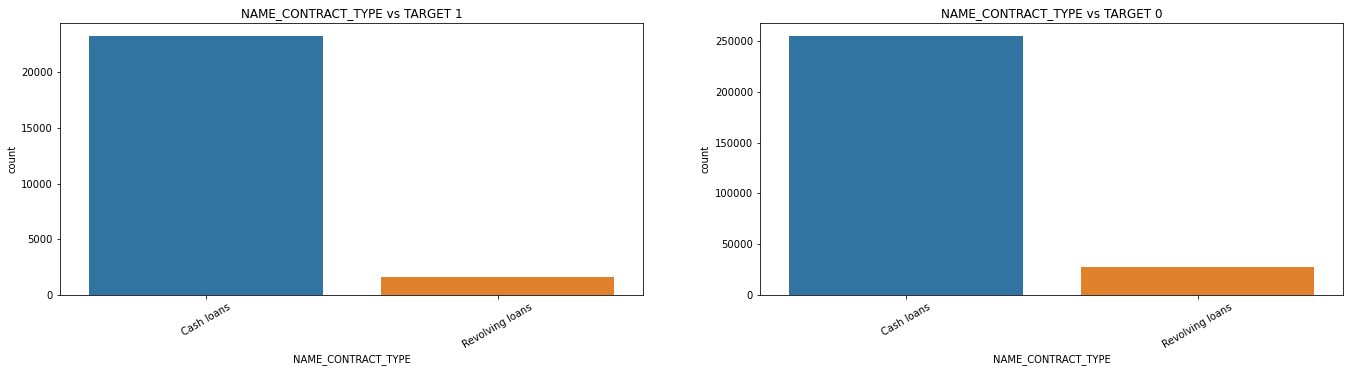

In [108]:
## Univariate for categorical NAME_EDUCATION_TYPE
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE vs TARGET 1")
f1 = sns.countplot(target_difficulty.NAME_CONTRACT_TYPE)
f1.set_xticklabels(labels=target_difficulty.NAME_CONTRACT_TYPE.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE vs TARGET 0")
f2 = sns.countplot(target_normal.NAME_CONTRACT_TYPE)
f2.set_xticklabels(labels=target_normal.NAME_CONTRACT_TYPE.value_counts().index, rotation=30)

****Observations****: Seems like Revolving loans applicants are less risky than Cash Loans<br>
TARGET 1 Revolving Loans bar is lesser than the TARGET 0 bar. <br>
But there is not change in Cash Loan bar. so basis of this given  above statement

<font color="teal">**NAME_FAMILY_STATUS**</font>

[Text(0, 0, 'Married'),
 Text(1, 0, 'Single / not married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Separated'),
 Text(4, 0, 'Widow'),
 Text(5, 0, 'Unknown')]

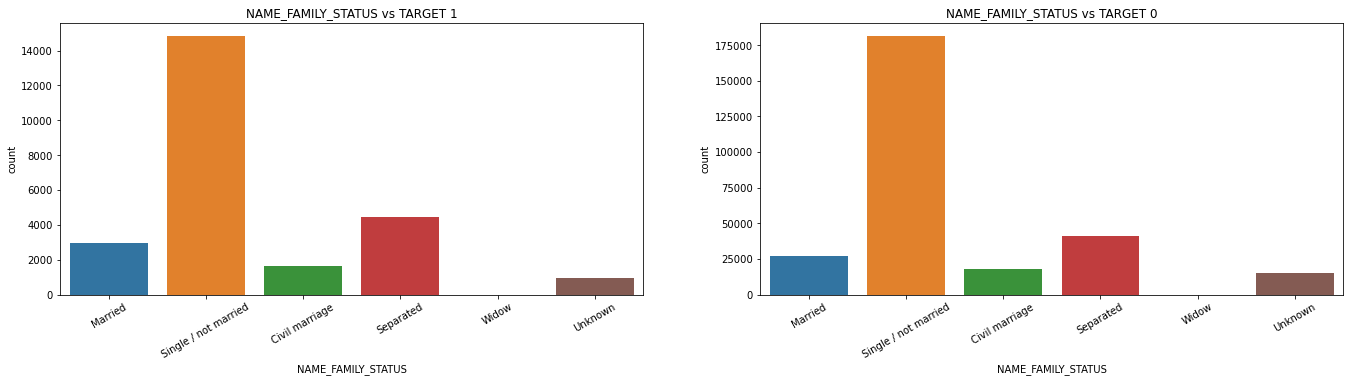

In [109]:
## Univariate for categorical NAME_FAMILY_STATUS
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("NAME_FAMILY_STATUS vs TARGET 1")
f1 = sns.countplot(target_difficulty.NAME_FAMILY_STATUS)
f1.set_xticklabels(labels=target_difficulty.NAME_FAMILY_STATUS.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("NAME_FAMILY_STATUS vs TARGET 0")
f2 = sns.countplot(target_normal.NAME_FAMILY_STATUS)
f2.set_xticklabels(labels=target_normal.NAME_FAMILY_STATUS.value_counts().index, rotation=30)

**Observation**:Married , Separated, Civil Marriage people are facing difficulty in repaying when we compared them with others(Single/ not married(facing difficulty, but much lesser than married),unkown)

<font color="teal">**NAME_HOUSING_TYPE**</font>

[Text(0, 0, 'House / apartment'),
 Text(1, 0, 'With parents'),
 Text(2, 0, 'Municipal apartment'),
 Text(3, 0, 'Rented apartment'),
 Text(4, 0, 'Office apartment'),
 Text(5, 0, 'Co-op apartment')]

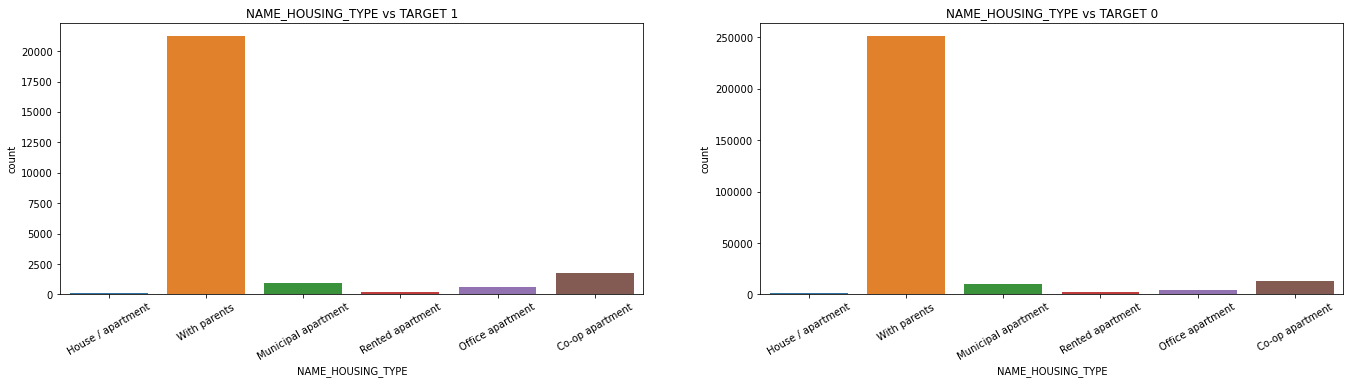

In [110]:
## Univariate for categorical NAME_HOUSING_TYPE
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("NAME_HOUSING_TYPE vs TARGET 1")
f1 = sns.countplot(target_difficulty.NAME_HOUSING_TYPE)
f1.set_xticklabels(labels=target_difficulty.NAME_HOUSING_TYPE.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("NAME_HOUSING_TYPE vs TARGET 0")
f2 = sns.countplot(target_normal.NAME_HOUSING_TYPE)
f2.set_xticklabels(labels=target_normal.NAME_HOUSING_TYPE.value_counts().index, rotation=30)

****Observations****: With Parents applications are higher and theire distribution is even in TARGET 1 and 0. But applicants living in  Municipal apartment, office apartment, Co-operative apartment are facing problem is repaying

<font color="teal">**FLAG_WORK_PHONE**</font>

[Text(0, 0, '0'), Text(1, 0, '1')]

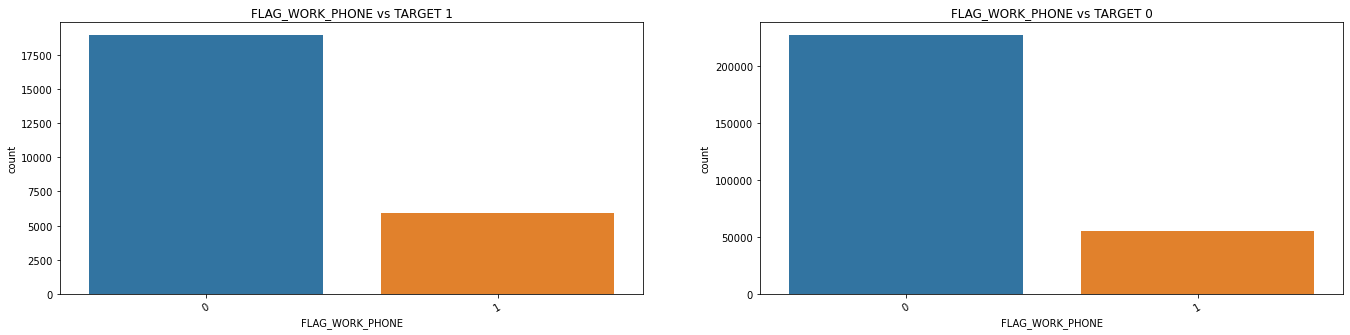

In [111]:
## Univariate for categorical FLAG_WORK_PHONE
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("FLAG_WORK_PHONE vs TARGET 1")
f1 = sns.countplot(target_difficulty.FLAG_WORK_PHONE)
f1.set_xticklabels(labels=target_difficulty.FLAG_WORK_PHONE.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("FLAG_WORK_PHONE vs TARGET 0")
f2 = sns.countplot(target_normal.FLAG_WORK_PHONE)
f2.set_xticklabels(labels=target_normal.FLAG_WORK_PHONE.value_counts().index, rotation=30)

****Observations****: Many applicants not provided work phone number. But interestly average people who provided work phone in facing defficulty in repaying

<font color="teal">**CNT_FAM_MEMBERS**</font>

[Text(0, 0, '2.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '3.0'),
 Text(3, 0, '4.0'),
 Text(4, 0, '5.0'),
 Text(5, 0, '6.0'),
 Text(6, 0, '7.0'),
 Text(7, 0, '8.0'),
 Text(8, 0, '9.0'),
 Text(9, 0, '16.0'),
 Text(10, 0, '10.0'),
 Text(11, 0, '12.0'),
 Text(12, 0, '14.0'),
 Text(13, 0, '20.0'),
 Text(14, 0, '15.0'),
 Text(15, 0, '11.0'),
 Text(16, 0, '13.0')]

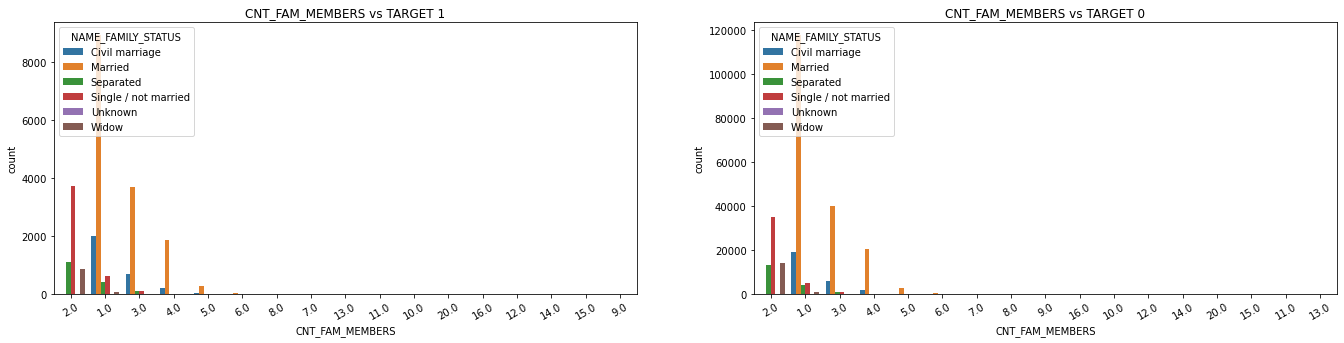

In [112]:
## Univariate for categorical CNT_FAM_MEMBERS
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("CNT_FAM_MEMBERS vs TARGET 1")
f1 = sns.countplot(target_difficulty.CNT_FAM_MEMBERS , hue=target_difficulty.NAME_FAMILY_STATUS)
f1.set_xticklabels(labels=target_difficulty.CNT_FAM_MEMBERS.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("CNT_FAM_MEMBERS vs TARGET 0")
f2 = sns.countplot(target_normal.CNT_FAM_MEMBERS, hue=target_normal.NAME_FAMILY_STATUS)
f2.set_xticklabels(labels=target_normal.CNT_FAM_MEMBERS.value_counts().index, rotation=30)

****Observations****:Both are pretty symmetrical . so no much info to form any assumptions. But received many applications from Married and family size 1  

<font color="teal">**REGION_RATING_CLIENT**</font>

[Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '1')]

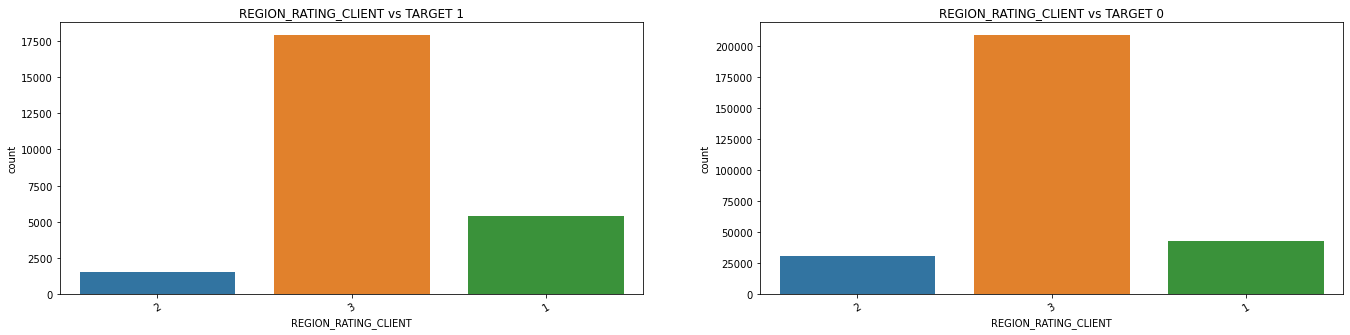

In [113]:
## Univariate for categorical REGION_RATING_CLIENT
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("REGION_RATING_CLIENT vs TARGET 1")
f1 = sns.countplot(target_difficulty.REGION_RATING_CLIENT)
f1.set_xticklabels(labels=target_difficulty.REGION_RATING_CLIENT.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("REGION_RATING_CLIENT vs TARGET 0")
f2 = sns.countplot(target_normal.REGION_RATING_CLIENT)
f2.set_xticklabels(labels=target_normal.REGION_RATING_CLIENT.value_counts().index, rotation=30)

****Observations****: applications received from region of rating 1 are facing difficulty in repaying.Region with rating 2 are bit good at repaying than other two rating(1,3)

<font color="teal">**REGION_RATING_CLIENT_W_CITY**</font>

[Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '1')]

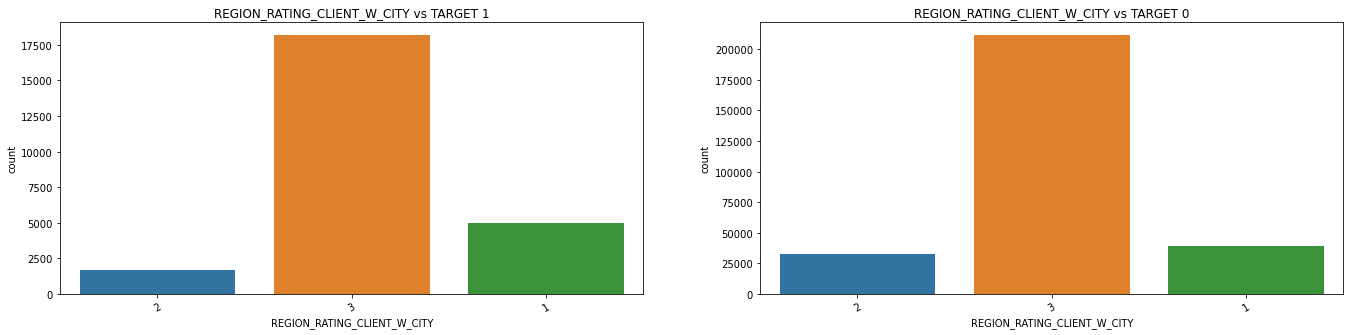

In [114]:
## Univariate for categorical REGION_RATING_CLIENT_W_CITY
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("REGION_RATING_CLIENT_W_CITY vs TARGET 1")
f1 = sns.countplot(target_difficulty.REGION_RATING_CLIENT_W_CITY)
f1.set_xticklabels(labels=target_difficulty.REGION_RATING_CLIENT_W_CITY.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("REGION_RATING_CLIENT_W_CITY vs TARGET 0")
f2 = sns.countplot(target_normal.REGION_RATING_CLIENT_W_CITY)
f2.set_xticklabels(labels=target_normal.REGION_RATING_CLIENT_W_CITY.value_counts().index, rotation=30)

****Observations****:applications received from city of rating 1 are facing difficulty in repaying. City with rating 2 are bit good at repaying than other two rating(1,3)

<font color="teal">**REG_CITY_NOT_LIVE_CITY**</teal>

[Text(0, 0, '0'), Text(1, 0, '1')]

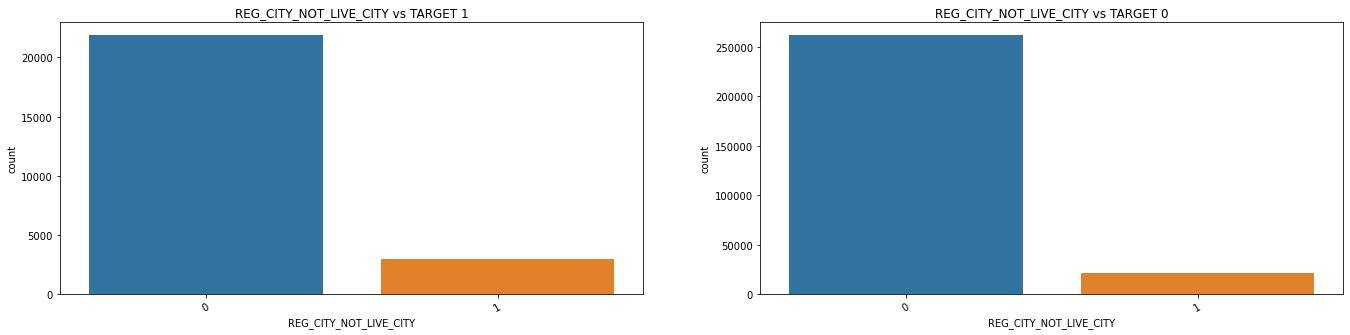

In [115]:
## Univariate for categorical REG_CITY_NOT_LIVE_CITY
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("REG_CITY_NOT_LIVE_CITY vs TARGET 1")
f1 = sns.countplot(target_difficulty.REG_CITY_NOT_LIVE_CITY)
f1.set_xticklabels(labels=target_difficulty.REG_CITY_NOT_LIVE_CITY.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("REG_CITY_NOT_LIVE_CITY vs TARGET 0")
f2 = sns.countplot(target_normal.REG_CITY_NOT_LIVE_CITY)
f2.set_xticklabels(labels=target_normal.REG_CITY_NOT_LIVE_CITY.value_counts().index, rotation=30)

****Observations****: applicants not living in registedred reason are facing issue in repaying(risk is a bit higher)

<font color="teal">**WALLSMATERIAL_MODE**</font>

[Text(0, 0, 'Panel'),
 Text(1, 0, 'Stone, brick'),
 Text(2, 0, 'Block'),
 Text(3, 0, 'Wooden'),
 Text(4, 0, 'Mixed'),
 Text(5, 0, 'Monolithic'),
 Text(6, 0, 'Others')]

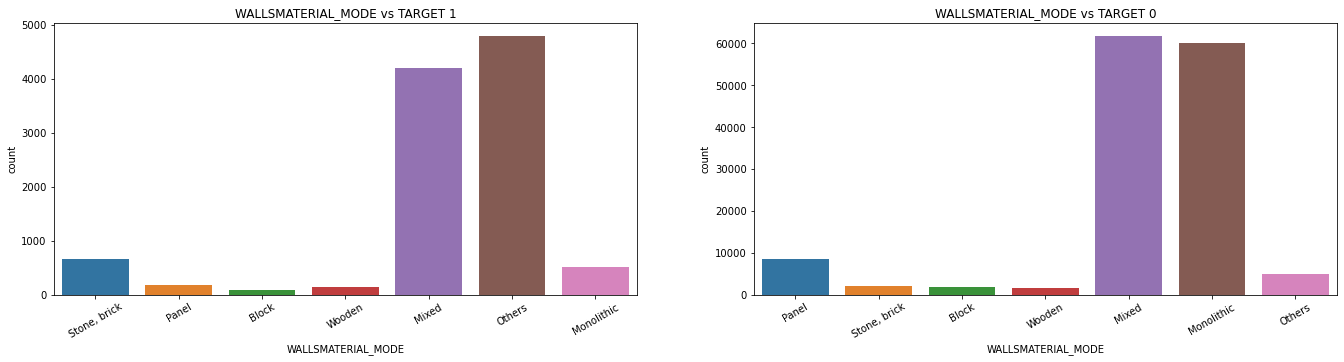

In [116]:
## Univariate for categorical WALLSMATERIAL_MODE
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("WALLSMATERIAL_MODE vs TARGET 1")
f1 = sns.countplot(target_difficulty.WALLSMATERIAL_MODE)
f1.set_xticklabels(labels=target_difficulty.WALLSMATERIAL_MODE.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("WALLSMATERIAL_MODE vs TARGET 0")
f2 = sns.countplot(target_normal.WALLSMATERIAL_MODE)
f2.set_xticklabels(labels=target_normal.WALLSMATERIAL_MODE.value_counts().index, rotation=30)

**Observations**: If the  Buiding Walls Material is  Monolithic , then these applicants are pretty comfortable repaying.<br>
Many applications who mentioned Walls Material as other are defaulted<br>
It is just unwanted correlation?


### **<font color="#F08080">7.4 Bivariant analysis on Categorical-Categorical Data with respective to Target</font>**

<font color="teal"> AMT_INCOME_TOTAL_BINS vs AMT_CREDIT_BINS</font>

[Text(0, 0, 'LOW'),
 Text(1, 0, 'HIGH'),
 Text(2, 0, 'Very High'),
 Text(3, 0, 'MEDIUM')]

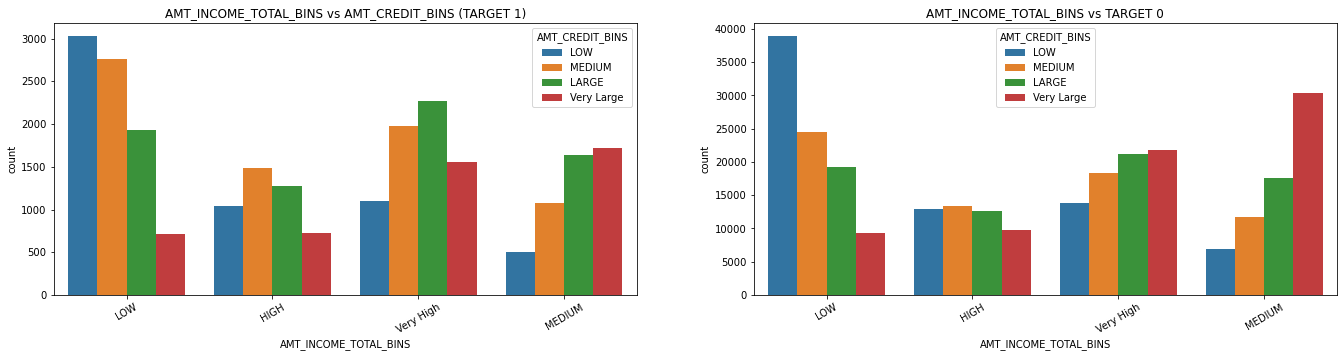

In [117]:
## Bivariant for categorical AMT_INCOME_TOTAL_BINS and AMT_CREDIT_BINS
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("AMT_INCOME_TOTAL_BINS vs AMT_CREDIT_BINS (TARGET 1)")
f1 = sns.countplot(target_difficulty.AMT_INCOME_TOTAL_BINS, hue=target_difficulty.AMT_CREDIT_BINS)
f1.set_xticklabels(labels=target_difficulty.AMT_INCOME_TOTAL_BINS.value_counts().index, rotation=30)
plt.subplot(1,2,2)
plt.title("AMT_INCOME_TOTAL_BINS vs TARGET 0")
f2 = sns.countplot(target_normal.AMT_INCOME_TOTAL_BINS, hue=target_normal.AMT_CREDIT_BINS)
f2.set_xticklabels(labels=target_normal.AMT_INCOME_TOTAL_BINS.value_counts().index, rotation=30)

****Observations****: Income was High and CREDIT Issued was medium or large : applicants are facing difficuty in repaying<br>
Income was low and credit issue was low applications are more in number<br>
Income was Low and credit issed was medium or Large applications: facing difficulty in repaying<br>
Income was Medium and credit issued was medium or large : facing difficulty

Income Low or Credit Low : 25 percentile 
Income Medium or Credit Low: 50 percentile of Income
Income High or Credit Large: 75 percentile of income
Income Very High or Credit very Large : 100 percentile of income

### **<font color="#F08080">7.5 Finding Hidden Correlation among Continuous Data</font>**

In [118]:
target_difficulty_corr_df = target_difficulty.select_dtypes(include=['int', 'float']).corr().round(decimals=2)
target_normal_corr_df = target_normal.select_dtypes(include=['int', 'float']).corr().round(decimals=2)

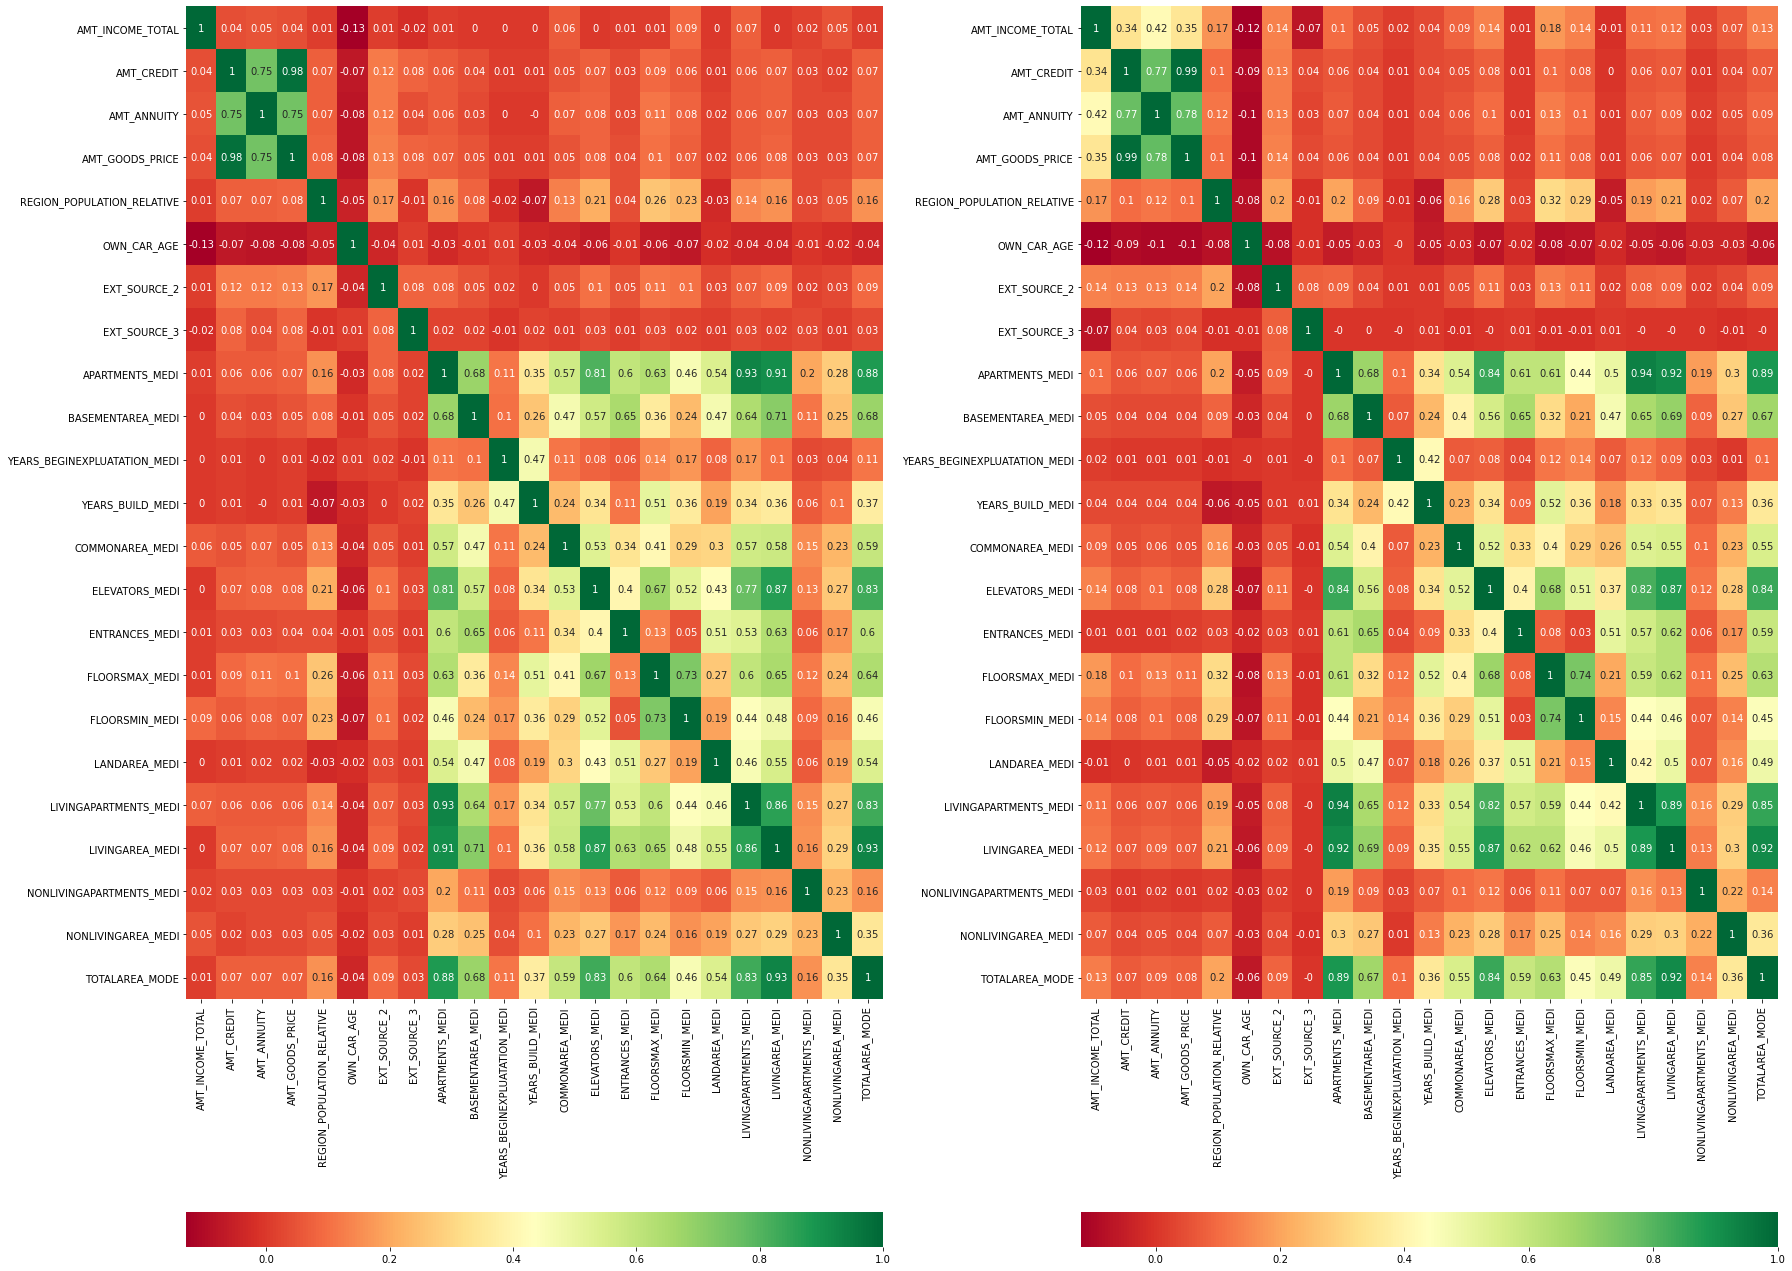

In [119]:
fig = plt.figure(figsize=(25,20))
plt.subplot(1,2,1)
sns.heatmap(target_difficulty_corr_df,  annot=True, cmap="RdYlGn", cbar_kws={"orientation": "horizontal"})
plt.subplot(1,2,2)
sns.heatmap(target_normal_corr_df,  annot=True, cmap="RdYlGn", cbar_kws={"orientation": "horizontal"})
plt.tight_layout()
plt.show()

### **<font color="#F08080">7.6 Observations</font>**

1. AMT_INCOME_TOTAL is not showing much correlation with AMT_CREDIT, AMT_GOODS_PRICEa and AMT_ANNUITY in taget_dfficulty  dataset. <br>
    But it has pretty good correlation with above attributes in target_normal dataset
2. AMT_INCOME_TOTAL don't have much correlation with TOTAL_AREA_MODE, LIVINGAREA_MEDI,FLOORSMAX_MEDI, ELEVETOR_MEDI, APARTMENTS_MEDI . but it has decent correlation in target normal dataset
3. Region population relative is not showing much correlation with AMT_INCOME_TOTAL in taget difficuty
4. Credit score from source 2 is correlated wit income in normal dataset. but no correlation in difficulty dataset.

### **<font color="#F08080">7.7 Univariant Analysis on Continuous Data with respective to Target</font>**

<font color="teal">**AMT_INCOME_TOTAL**</font>

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

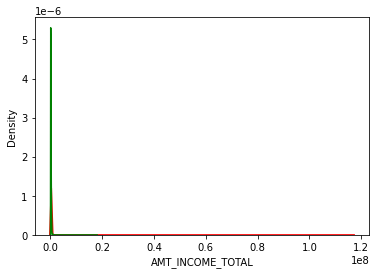

In [120]:
## Univariate for continuous

sns.distplot(target_difficulty.AMT_INCOME_TOTAL, hist = False, label = 'Target 1', color="red")
sns.distplot(target_normal.AMT_INCOME_TOTAL, hist = False, label = 'Target 0', color="green")

Few Outliers  present in target Difficulty Income data

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

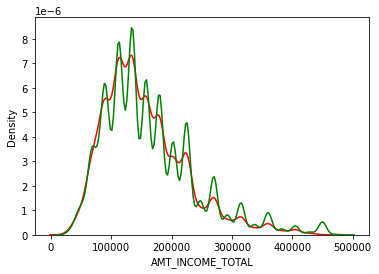

In [121]:
# Analysis on 99% percentile data
sns.distplot(target_difficulty[target_difficulty.AMT_INCOME_TOTAL < target_difficulty.AMT_INCOME_TOTAL.quantile(0.99)]["AMT_INCOME_TOTAL"], hist = False, label = 'Target 1', color="red")
sns.distplot(target_normal[target_normal.AMT_INCOME_TOTAL < target_normal.AMT_INCOME_TOTAL.quantile(0.99)]["AMT_INCOME_TOTAL"], hist = False, label = 'Target 0', color="green")

****Observations****:<br>
Positive skew<br>
Has many local peaks<br>
People with huge income are less likely to default


<font color="teal">**AMT_CREDIT**</font>

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

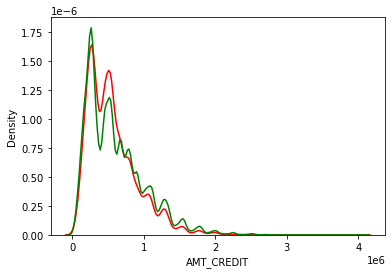

In [122]:
## Univariate for continuos

sns.distplot(target_difficulty.AMT_CREDIT, hist = False, label = 'Target 1', color="red")
sns.distplot(target_normal.AMT_CREDIT, hist = False, label = 'Target 0', color="green")

****Observations****:
applications credit amount falls in percentile 60 t0 80 are facing issues while repaying

<font color="teal">**AMT_ANNUITY**</font>

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

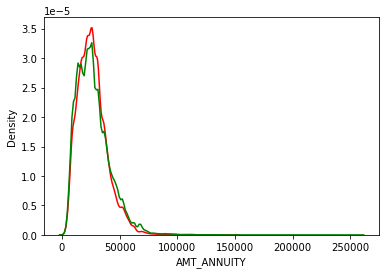

In [123]:
## Univariate for continuos

sns.distplot(target_difficulty.AMT_ANNUITY, hist = False, label = 'Target 1', color="red")
sns.distplot(target_normal.AMT_ANNUITY, hist = False, label = 'Target 0', color="green")

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

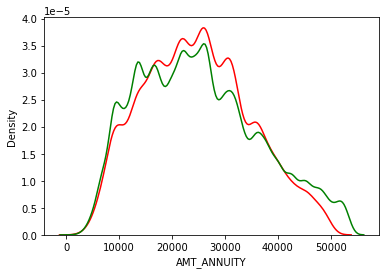

In [124]:
## Univariate for continuos

sns.distplot(target_difficulty.AMT_ANNUITY[target_difficulty.AMT_ANNUITY < target_difficulty.AMT_ANNUITY.quantile(0.95)], hist = False, label = 'Target 1', color="red")
sns.distplot(target_normal.AMT_ANNUITY[target_normal.AMT_ANNUITY < target_normal.AMT_ANNUITY.quantile(0.95)], hist = False, label = 'Target 0', color="green")

****Observations****:TODO

<font color="teal">**AMT_GOODS_PRICE**</font>

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

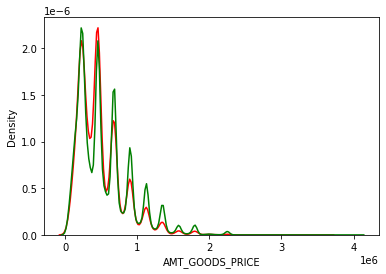

In [125]:
## Univariate for continuos

sns.distplot(target_difficulty.AMT_GOODS_PRICE, hist = False, label = 'Target 1', color="red")
sns.distplot(target_normal.AMT_GOODS_PRICE, hist = False, label = 'Target 0', color="green")

****Observation****:TODO

<font color="teal">**TOTALAREA_MODE**</font>

<AxesSubplot:xlabel='TOTALAREA_MODE', ylabel='Density'>

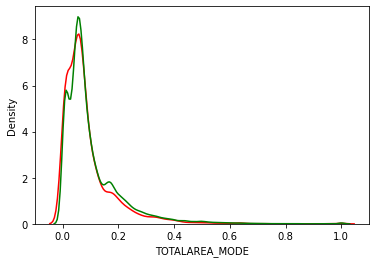

In [126]:
## Univariate for continuos

sns.distplot(target_difficulty.TOTALAREA_MODE, hist = False, label = 'Target 1', color="red")
sns.distplot(target_normal.TOTALAREA_MODE, hist = False, label = 'Target 0', color="green")

****Observations:****:TODO

<font color="teal">**EXT_SOURCE_2**</font>

<AxesSubplot:xlabel='EXT_SOURCE_2', ylabel='Density'>

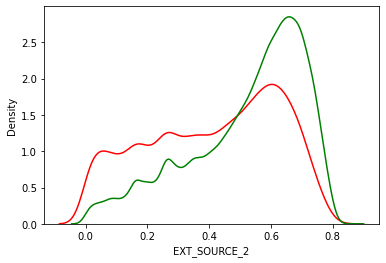

In [127]:
## Univariate for continuos

sns.distplot(target_difficulty.EXT_SOURCE_2, hist = False, label = 'Target 1', color="red")
sns.distplot(target_normal.EXT_SOURCE_2, hist = False, label = 'Target 0', color="green")

****Observations****: application with less EXT_SOURCE_2 score  facing difficulty in repaying.

In [128]:
target_difficulty[target_difficulty.EXT_SOURCE_2 < 0].value_counts()

Series([], dtype: int64)

### **<font color="#F08080">7.8 Bivariant Analysis on Continuous - Continuous Data with respective to Target</font>**

Note Scatter Plots

<font color="teal">**AMT_INCOME_TOTAL_BINS vs AMT_CREDIT_BINS**</font>

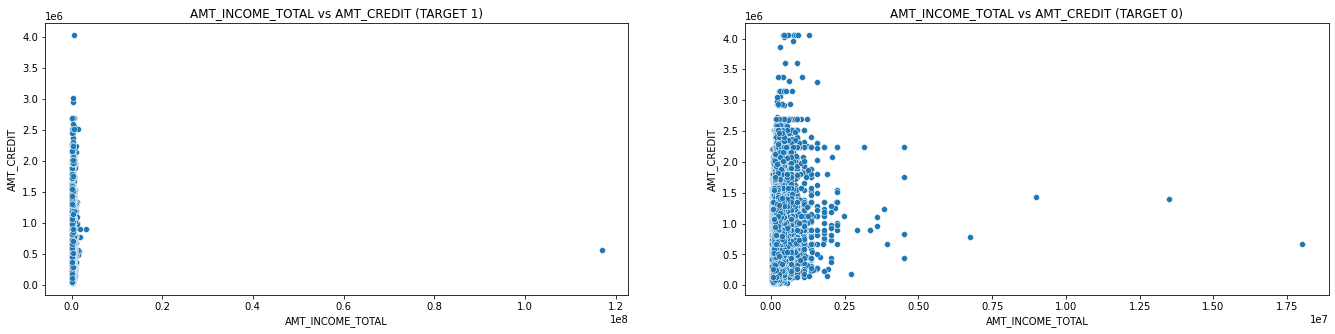

In [129]:
# Bivariant for categorical AMT_INCOME_TOTAL and AMT_CREDIT
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 1)")

sns.scatterplot(target_difficulty.AMT_INCOME_TOTAL, y=target_difficulty.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 0)")
sns.scatterplot(target_normal.AMT_INCOME_TOTAL, y=target_normal.AMT_CREDIT)
plt.show()

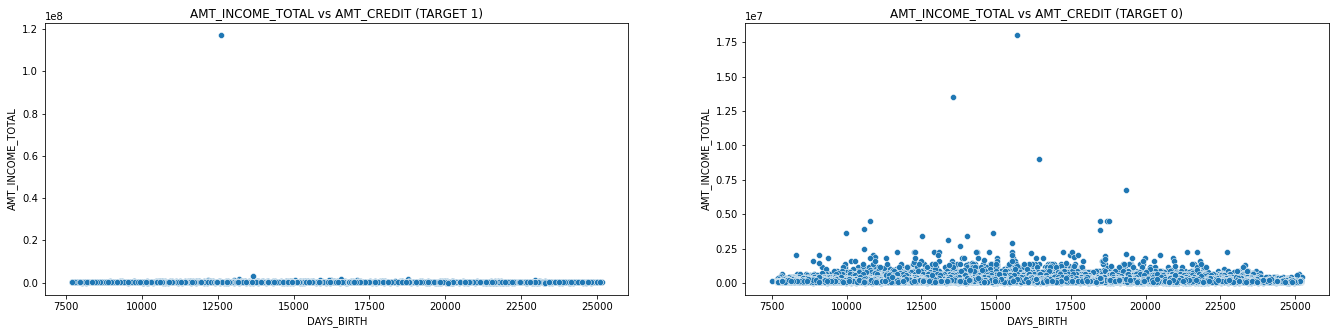

In [130]:
# Bivariant for categorical AMT_INCOME_TOTAL and AMT_CREDIT
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 1)")

sns.scatterplot(target_difficulty.DAYS_BIRTH, y=target_difficulty.AMT_INCOME_TOTAL)
plt.subplot(1,2,2)
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 0)")
sns.scatterplot(target_normal.DAYS_BIRTH, y=target_normal.AMT_INCOME_TOTAL)
plt.show()

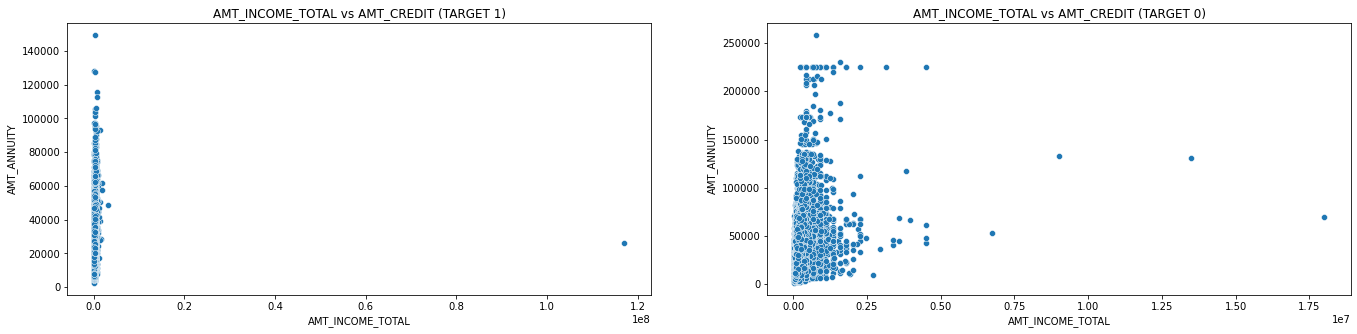

In [131]:
# Bivariant for categorical AMT_INCOME_TOTAL and AMT_CREDIT
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 1)")

sns.scatterplot(target_difficulty.AMT_INCOME_TOTAL, y=target_difficulty.AMT_ANNUITY)
plt.subplot(1,2,2)
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 0)")
sns.scatterplot(target_normal.AMT_INCOME_TOTAL, y=target_normal.AMT_ANNUITY)
plt.show()

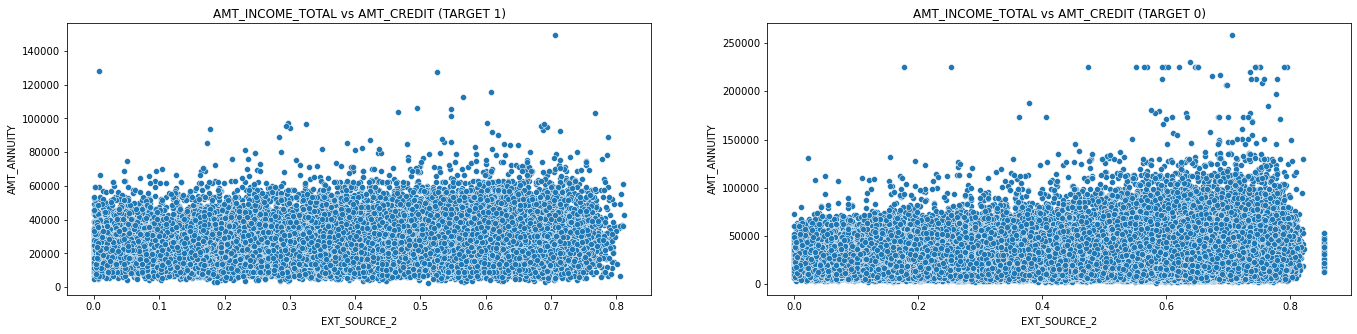

In [132]:
# Bivariant for categorical AMT_INCOME_TOTAL and AMT_CREDIT
plt.figure(figsize = (23,5))
plt.subplot(1,2,1)
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 1)")

sns.scatterplot(target_difficulty.EXT_SOURCE_2, y=target_difficulty.AMT_ANNUITY)
plt.subplot(1,2,2)
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 0)")
sns.scatterplot(target_normal.EXT_SOURCE_2, y=target_normal.AMT_ANNUITY)
plt.show()

In [133]:
# ## Bivariant for categorical AMT_INCOME_TOTAL and AMT_CREDIT
# plt.figure(figsize = (23,5))
# plt.subplot(1,2,1)
# plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 1)")
# f1 = sns.scatterplot(target_difficulty.DAYS_BIRTH, hue=target_difficulty.AMT_INCOME_TOTAL)
# plt.subplot(1,2,2)
# plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT (TARGET 0)")
# f2 = sns.countplot(target_normal.DAYS_BIRTH, hue=target_normal.AMT_INCOME_TOTAL)
# plt.show()

### **<font color="#F08080">7.9 Bivariant Analysis on Categorical and Continuous Data with respective to Target</font>**

<AxesSubplot:title={'center':'AMT_INCOME_TOTAL_BIN Vs AGE'}, xlabel='AMT_INCOME_TOTAL_BINS', ylabel='DAYS_BIRTH'>

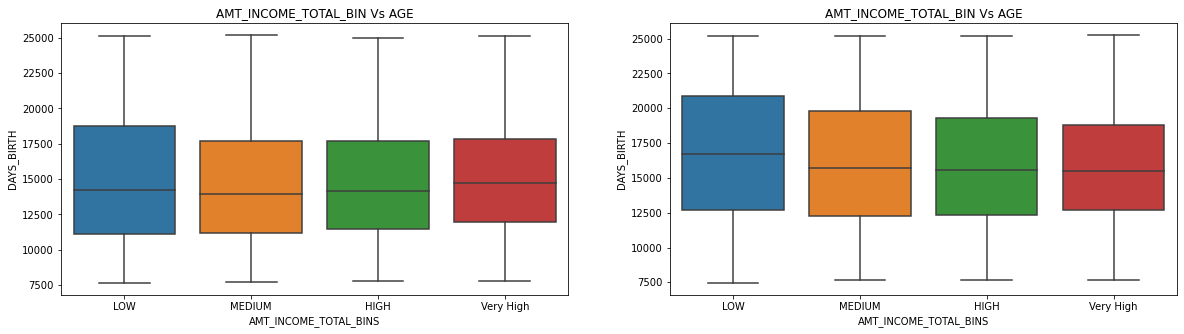

In [134]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("AMT_INCOME_TOTAL_BIN Vs AGE")
sns.boxplot(x = 'AMT_INCOME_TOTAL_BINS', y = 'DAYS_BIRTH', data = target_difficulty)

plt.subplot(1,2,2)
plt.title("AMT_INCOME_TOTAL_BIN Vs AGE")
sns.boxplot(x  = 'AMT_INCOME_TOTAL_BINS', y = 'DAYS_BIRTH', data = target_normal)


## **<font color="blue">PREVIOUS DATA</font>**
1. Data Loading
2. Checking,  
    2.1 Size<br>
    2.2 Shape<br>
    2.3 Data Attributes<br>
    2.4 Data type of each Attribute<br>
    2.5 Description and Distribution of Data<br>
    2.6 Identifying Categorical Data<br>
    2.7 Understanding Categorical Data Provided<br>
    2.8 Observations 1<br>
    2.9 Identifying Continuous Data<br>
    2.10 Understanding Continuous Data Provided<br>
    2.11 Observations 2<br>
3. Univariant Analysis on selected Data
4. Bivariant Analysis on Selected Data
5. Summary

## **<font color="sky blue">1. Data Loading</font>** :

**Loading..**

In [135]:
# Loading Data from CSV to dataframe. Using pandas read_csv function to load data to dataframe
previous_data = pd.read_csv("DATA/previous_application.csv")

# To display first 10 records
previous_data.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

## **<font color="sky blue">2.Data checks</font>**

### **<font color="#F08080">2.1 Size & 2.2 Shape</font>**

In [136]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Previous Data
        - Number of Records: 16,70,214
        - Number of Dimensions : 37
        - Data size : 471.5+ MB

### **<font color="#F08080">2.3 Data Attributes</font>**

In [137]:
previous_data.columns.to_list()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

Description of these attributes provide here: **https://docs.google.com/spreadsheets/d/1XGLeDgbWSswnJVhrS_GDKdDzWd_nDJJxWVDAySUJxpE/edit?usp=sharing**

### **<font color="#F08080">2.4 Data type of each Attribute</font>**

In [138]:
previous_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### **<font color="#F08080">2.5 Description and Distribution of Data</font>**

In [139]:
previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### **<font color="#F08080">2.6 Identifying Categorical Data</font>**

In [140]:
#To find number of unique values in each column
previous_data.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [141]:
categorical_data = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT", 
 "NFLAG_LAST_APPL_IN_DAY" , "RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED", "NAME_CASH_LOAN_PURPOSE", 
 "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "NAME_TYPE_SUITE", "NAME_CLIENT_TYPE",
"NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "NAME_SELLER_INDUSTRY",
"CNT_PAYMENT", "NAME_YIELD_GROUP", "PRODUCT_COMBINATION", "NFLAG_INSURED_ON_APPROVAL"]

In [142]:
len(categorical_data)

22

### **<font color="#F08080">2.7 Understanding Categorical Data Provided</font>**

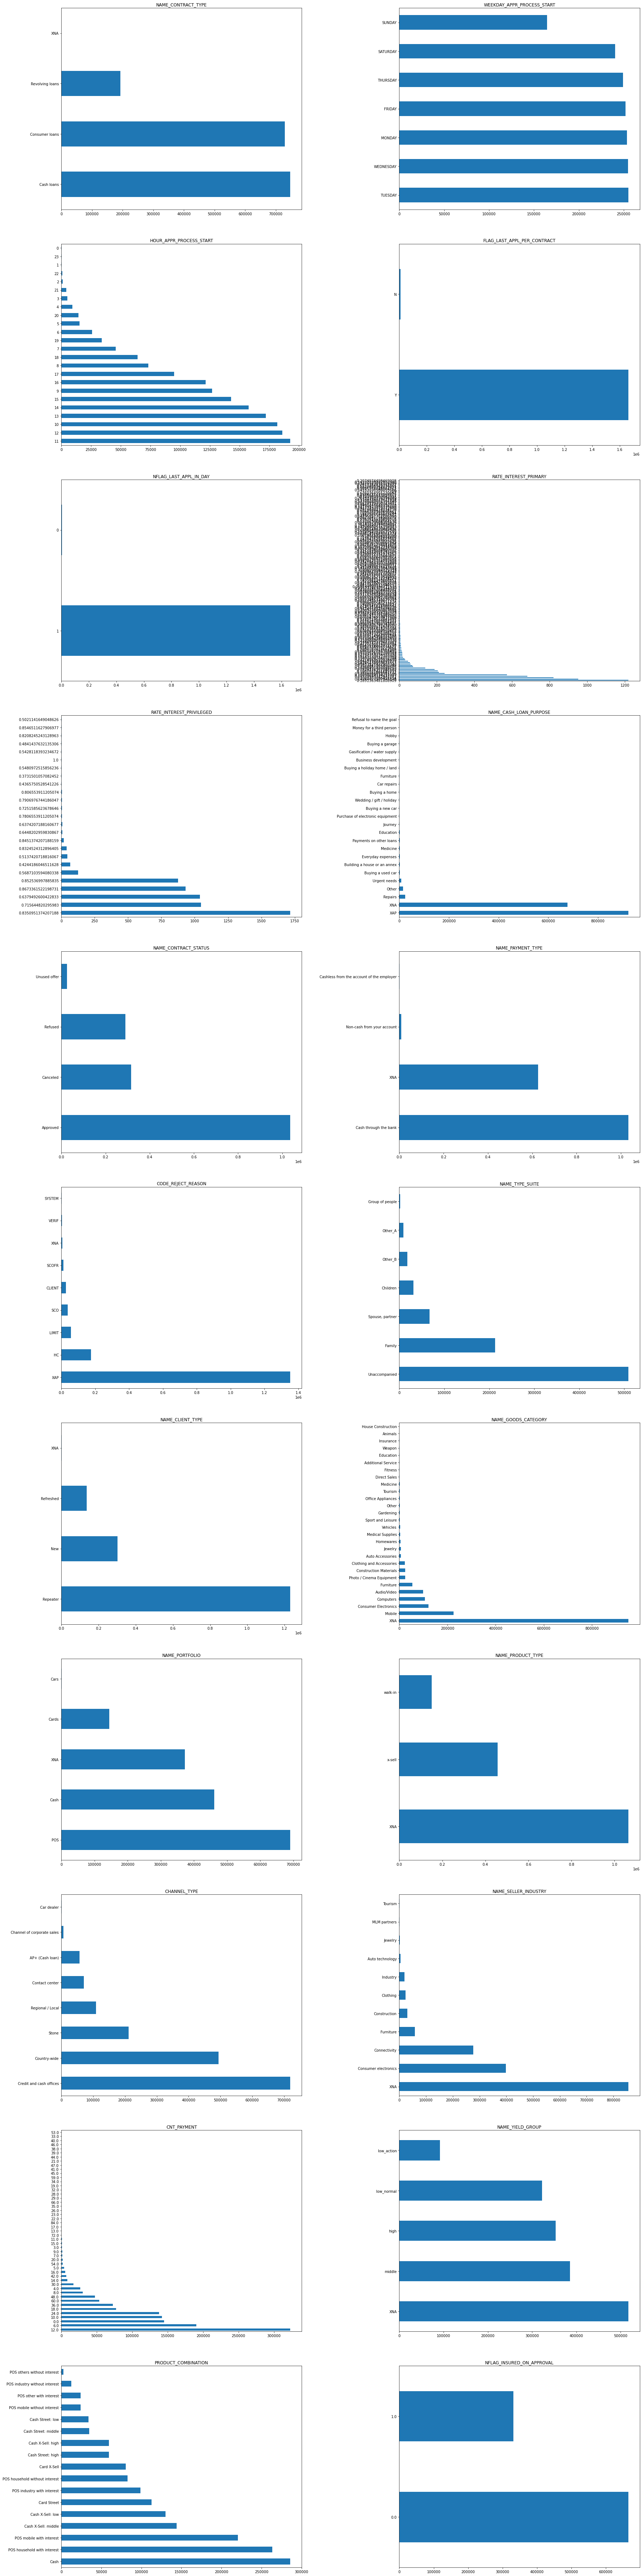

In [143]:
fig = plt.figure(figsize=(25,100))
for index, col in enumerate(categorical_data):
    ax= fig.add_subplot(11,2, index+1)
    ax.set_title(col)
    previous_data[col].value_counts().plot(kind ="barh")

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

### **<font color="#F08080">2.8 Observations 1</font>**
1. Previous Data Set has Consumer Loans applications as well. But in aplication data we have only cash loans and revolving loans applications
2. Most of the application processed between 11 am to 4 pm
3. Applicants are interested in  interest previlage rate  0.6 to 0.8350
4. Cancelled and Refused Loans count is nearer
5. Tpeater and New clients are higher in number
6. paymnet counts 12, and 6 appications are higher
7. For many applications , purpose of cash loan is either not applicable or Nor avaialble. May be for non cashloans it's nor required.
8. Many Columns are with high XNA

In [144]:
previous_data.groupby(["SK_ID_CURR"])

### **<font color="#F08080">2.9 Identifying Continuous Data</font>**

In [145]:
#To get all numerical columns
numberical_data_columns = list(set(previous_data.columns.to_list()) - set(categorical_data))
print(numberical_data_columns)

['AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'SK_ID_CURR', 'DAYS_LAST_DUE', 'AMT_CREDIT', 'SK_ID_PREV', 'DAYS_TERMINATION', 'AMT_DOWN_PAYMENT', 'AMT_APPLICATION', 'RATE_DOWN_PAYMENT', 'AMT_ANNUITY']


### **<font color="#F08080">2.10 Understanding Continuous Data Provided</font>**

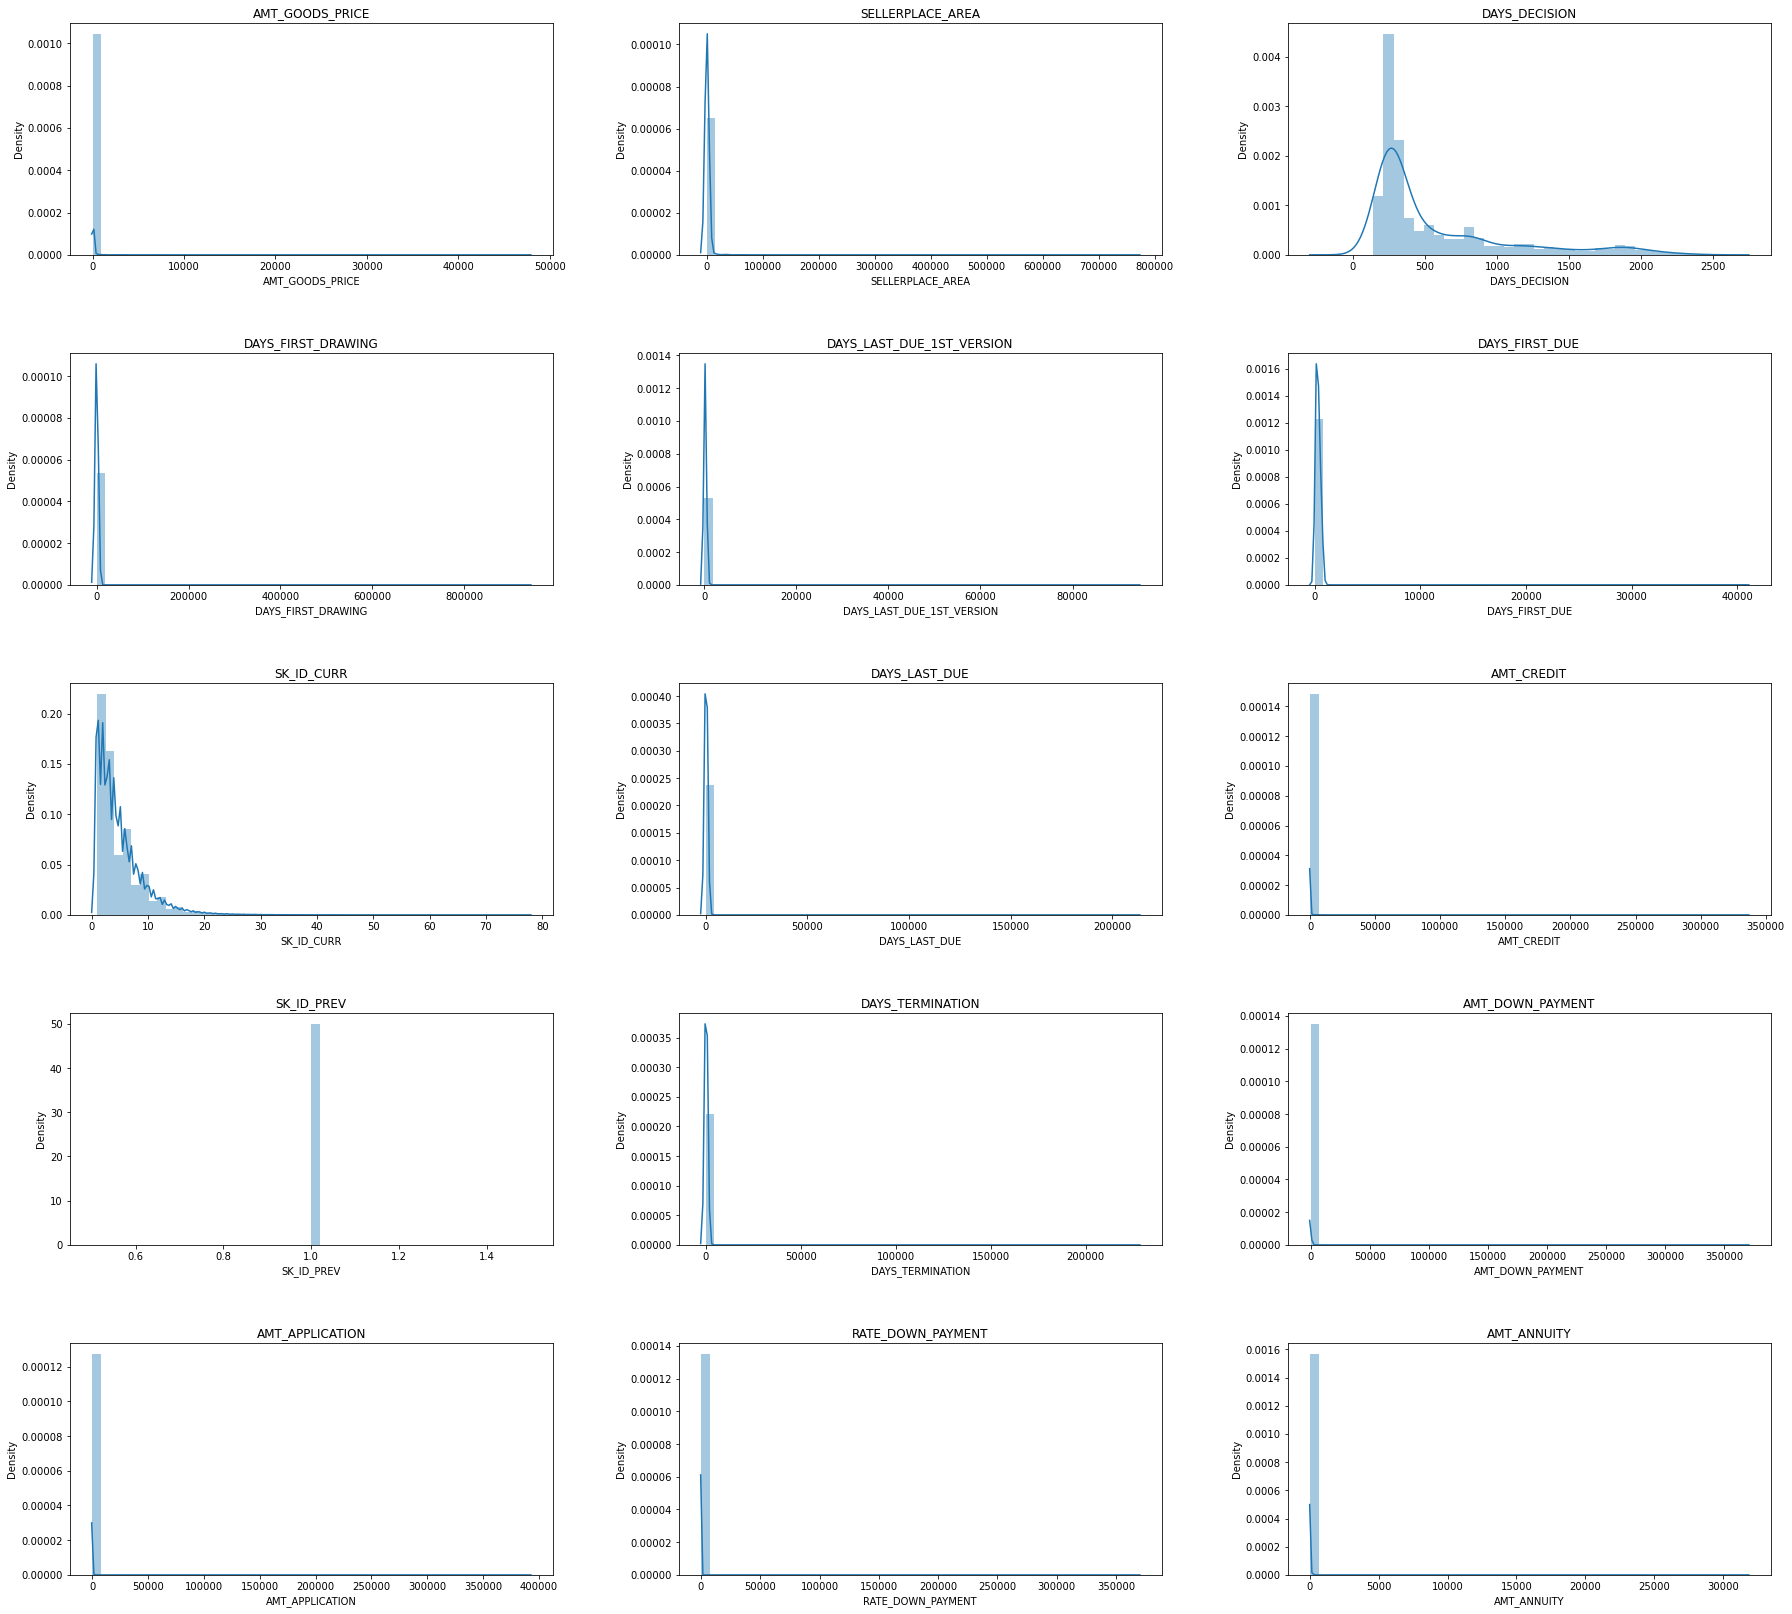

In [146]:
fig = plt.figure(figsize=(25,100))
column = 0
row = 0
for index, col in enumerate(numberical_data_columns):
    if column > 4:
        column = 0
        row = row+1
    ax= fig.add_subplot(22,3, index+1)
    ax.set_title(col)
    sns.distplot(previous_data[col].value_counts())

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

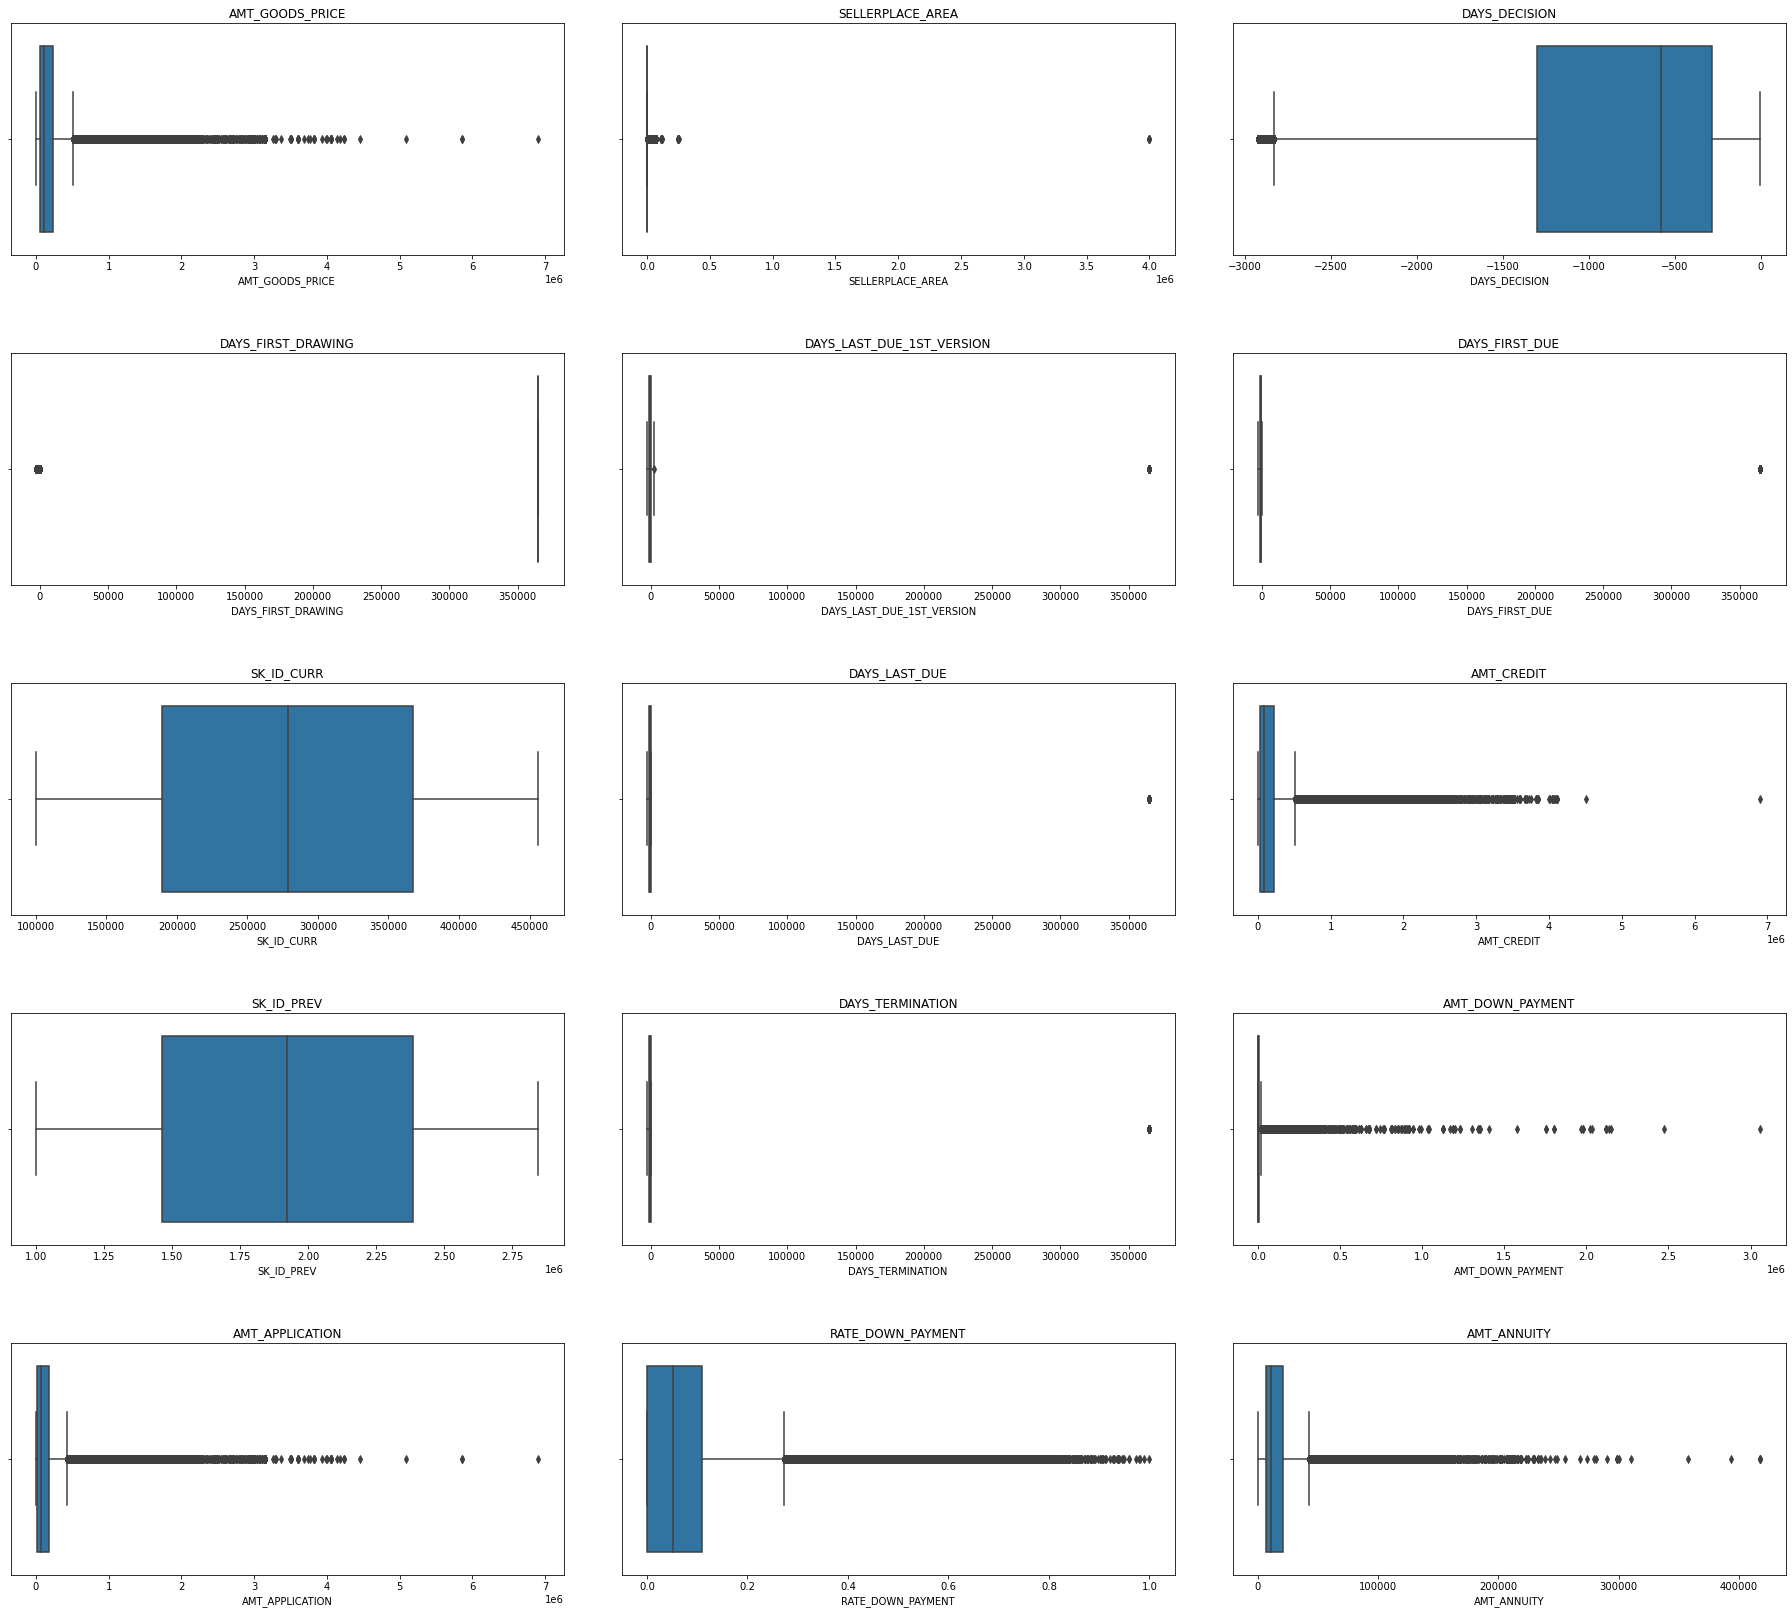

In [147]:
fig = plt.figure(figsize=(25,100))
for index, col in enumerate(numberical_data_columns):
    if column > 4:
        column = 0
        row = row+1
    ax= fig.add_subplot(22,3, index+1)
    ax.set_title(col)
    sns.boxplot(previous_data[col])

plt.tight_layout(w_pad=5, h_pad=5)           
plt.show()

In [148]:
previous_data.DAYS_LAST_DUE.value_counts()

 365243.0    211221
-245.0          658
-188.0          650
-239.0          642
-167.0          638
-247.0          629
-305.0          627
-268.0          624
-236.0          623
-160.0          623
-240.0          620
-308.0          620
-153.0          617
-174.0          616
-171.0          616
-175.0          616
-243.0          615
-193.0          614
-211.0          613
-181.0          613
-333.0          613
-184.0          611
-223.0          611
-241.0          611
-185.0          611
-192.0          610
-320.0          610
-12.0           610
-164.0          609
-204.0          608
-202.0          608
-232.0          608
-275.0          606
-238.0          605
-207.0          605
-234.0          605
-248.0          605
-189.0          604
-284.0          604
-231.0          604
-276.0          603
-242.0          603
-134.0          603
-244.0          602
-92.0           602
-200.0          601
-271.0          601
-371.0          601
-216.0          601
-217.0          601


In [149]:
211221/len(previous_data)*100

12.646343522446823

In [150]:
365243.0/365

1000.6657534246575

In [151]:
previous_data.DAYS_LAST_DUE.min()

-2889.0

### **<font color="#F08080">2.11 Observations 2</font>**

1. All Data coulumns has outliers
2. Seems like few applications stands way speacial to others
3. AMT_ANNUITY, AMT_GOODS_PROCE and AMT_CREDIT have same distribution.
4. Many application don't have have existing loan
5. on average 1 application in application data can have 5 records in previous data.


In [152]:
previous_data.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [153]:
previous_data_approved = previous_data[previous_data.NAME_CONTRACT_STATUS == "Approved"]
previous_data_cancelled = previous_data[previous_data.NAME_CONTRACT_STATUS == "Canceled"]
previous_data_Refused = previous_data[previous_data.NAME_CONTRACT_STATUS == "Refused"]
previous_data_unusedoffer = previous_data[previous_data.NAME_CONTRACT_STATUS == "Unused offer"]

## **<font color="sky blue">3. Univariant Analysis on selected Data with respective to NAME_CONTRACT_STATUS</font>**

There are many previous records for single curr application

<font color="teal">**NAME_CONTRACT_TYPE**</font>

<AxesSubplot:>

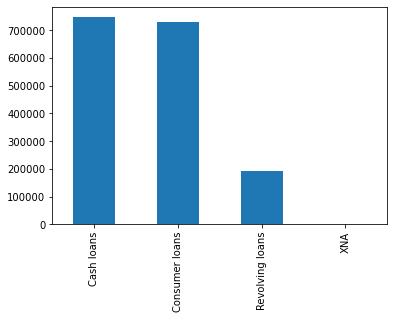

In [154]:
previous_data.NAME_CONTRACT_TYPE.value_counts().plot(kind="bar")

<AxesSubplot:>

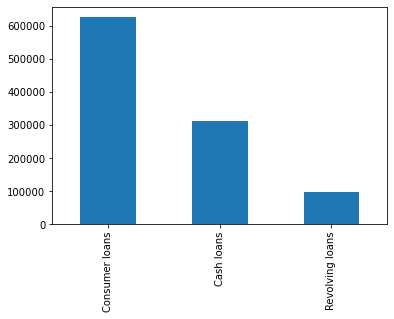

In [155]:
previous_data_approved.NAME_CONTRACT_TYPE.value_counts().plot(kind="bar")

<AxesSubplot:>

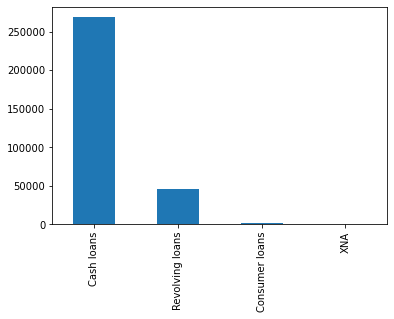

In [156]:
previous_data_cancelled.NAME_CONTRACT_TYPE.value_counts().plot(kind="bar")

<AxesSubplot:>

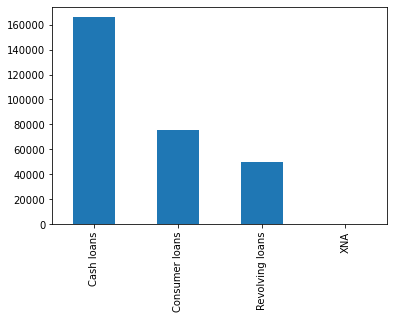

In [157]:
previous_data_Refused.NAME_CONTRACT_TYPE.value_counts().plot(kind="bar")

<AxesSubplot:>

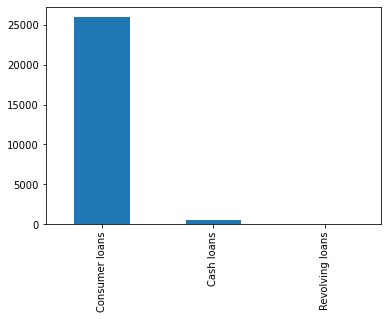

In [158]:
previous_data_unusedoffer.NAME_CONTRACT_TYPE.value_counts().plot(kind="bar")

Unused offer count is high for consumer loans. Where as number of application with status  Accepted, Rejected are high for cash loans


## **<font color="sky blue">4. Bivariant Analysis on Selected Data with respective to NAME_CONTRACT_STATUS</font>**

## **<font color="sky blue">5. Summary</font>**

Dataset is pretty huge<br>
Many Previous records found for Curr Application<br>
Consumer Loans are presented in Previous data. But in APplication data we don't have consuler applications<br>
There are good changes that applicants may have multiple active loans<br>

We can crate a new dataset using previous data<br>
Example total amount of annuity applicant paying, How many days applicant is away from the last payment. etc<br>


In [159]:
previous_data['Count'] = previous_data.groupby('SK_ID_CURR')['SK_ID_CURR'].transform('count')

In [160]:
previous_data[previous_data['Count'] > 0][["SK_ID_CURR","NAME_CONTRACT_TYPE", "Count", "NAME_CONTRACT_STATUS"]].head()

SK_ID_CURR NAME_CONTRACT_TYPE  Count NAME_CONTRACT_STATUS
0      271877     Consumer loans      3             Approved
1      108129         Cash loans      6             Approved
2      122040         Cash loans      4             Approved
3      176158         Cash loans     23             Approved
4      202054         Cash loans     25              Refused

**previous data has many record which are corresponding to single application in aplication data**

In [161]:
previous_data['Count'].median()

7.0

# <font color="blue">End Notes</font>
    Driving factored for credit risk analysis are,
    
    Income , Amount credited, Annuity, Sum of previous active loans annuity, Previous Loan ending Date, Gender, Document type 3 submitted or not,
    Register city same as live city or not, occupation,  live region rating, Credit Score from credit bureau, type of apartment or house applicant living in, Different metrix of the building applicant statying in.
    